Librerías


In [ ]:
#Librería para lectura de archivos de entorno:
import os
from dotenv import load_dotenv

#Librerías para cálculo y gráficas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para la conexión a BBDD:
import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

#Librerías dash
from dash import Dash, dcc, html, Input, Output

#Librerías sk-learn para la imputación de review_nulas
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Para la validación cruzada
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

Comprobación del directorio actual

In [23]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

Importación del csv del dataframe de limpieza.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts.

In [36]:
df = pd.read_csv(r'../Data/2025_04_28_Sprint03.csv')

In [37]:
df.head()

apartment_id                                               name  \
0      15248525     appt dans villa � Llansa ,beau jardin,terrasse   
1      44391173                              Hostal Escadarcs 1780   
2      32088176  Two-level apartment, wifi, terrace, swimming pool   
3      45803831                    Villa Solecito at Illes Balears   
4      43993521  Apartment Sant Lluis,2 minutes walk from the b...   

                                         description    host_id  \
0  Mon logement est proche de la plage et des com...   84213236   
1  Peque�o hostal construido de 1780, situado en ...  358199210   
2  Authentic 2 level apartment, located on the su...  240662122   
3  Villa Solecito provides a most comfortable and...  345010290   
4  Apartments located in the central part of Llor...   59318446   

      neighbourhood_name neighbourhood_district        room_type  \
0                 Llan��                    NaN  Entire home/apt   
1  Fontanals de Cerdanya                    NaN     Private room   
2          Lloret de Mar                    NaN  Entire home/apt   
3                  Mah�n                    NaN  Entire home/apt   
4          Lloret de Mar                    NaN  Entire home/apt   

   accommodates  bathrooms  bedrooms  ...  reviews_per_month country     city  \
0             6        1.0       2.0  ...               66.0   spain   girona   
1            16        0.0       2.0  ...                NaN   spain   girona   
2             4        1.0       1.0  ...               57.0   spain   girona   
3            12        6.0       6.0  ...                NaN   spain  menorca   
4             6        1.0       2.0  ...               29.0   spain   girona   

   insert_date                               amenities_normalized  \
0   2021-02-27  air conditioning, balcony, bathroom essentials...   
1   2021-02-27  air conditioning, bathroom essentials, bathroo...   
2   2021-02-27  24-hour check-in, balcony, bathroom essentials...   
3   2021-02-27  air conditioning, bathroom essentials, bathroo...   
4   2021-02-27  air conditioning, bathroom essentials, bathroo...   

  days_occupied  occupancy_rate  supera_80  amenities_count  \
0             0        0.000000       True               27   
1             0        0.000000      False               10   
2            30      100.000000       True               29   
3            29       96.666667      False               22   
4             3       10.000000       True               23   

                                normalized_amenities  
0  childrenu2019s books and toys, cleaning before...  
1  essentials, fire extinguisher, hair dryer, han...  
2  coffee maker, cooking basics, dedicated worksp...  
3  air conditioning, bed linens, cable tv, coffee...  
4  air conditioning, bed linens, carbon monoxide ...  

[5 rows x 41 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9633 entries, 0 to 9632
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9633 non-null   int64  
 1   name                         9630 non-null   object 
 2   description                  9497 non-null   object 
 3   host_id                      9633 non-null   int64  
 4   neighbourhood_name           9633 non-null   object 
 5   neighbourhood_district       5849 non-null   object 
 6   room_type                    9633 non-null   object 
 7   accommodates                 9633 non-null   int64  
 8   bathrooms                    9567 non-null   float64
 9   bedrooms                     9566 non-null   float64
 10  beds                         9588 non-null   float64
 11  amenities_list               9633 non-null   object 
 12  price                        9633 non-null   float64
 13  minimum_nights    

Exploración inicial de los datos asociados a Experiencia del Cliente

In [39]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

apartment_id first_review_date last_review_date  review_scores_rating  \
count   9.633000e+03              7095             7096           6993.000000   
unique           NaN              2156             1514                   NaN   
top              NaN        2018-04-01       2020-03-08                   NaN   
freq             NaN                25               49                   NaN   
mean    2.124478e+07               NaN              NaN            919.222079   
std     1.161495e+07               NaN              NaN             92.496960   
min     1.196400e+04               NaN              NaN            200.000000   
25%     1.334021e+07               NaN              NaN            890.000000   
50%     2.068392e+07               NaN              NaN            940.000000   
75%     3.019509e+07               NaN              NaN            980.000000   
max     4.806155e+07               NaN              NaN           1000.000000   

        review_scores_accuracy  review_scores_cleanliness  \
count              6984.000000                6990.000000   
unique                     NaN                        NaN   
top                        NaN                        NaN   
freq                       NaN                        NaN   
mean                 94.501718                  93.137339   
std                   9.474719                  10.079794   
min                  20.000000                  20.000000   
25%                  90.000000                  90.000000   
50%                 100.000000                 100.000000   
75%                 100.000000                 100.000000   
max                 100.000000                 100.000000   

        review_scores_checkin  review_scores_communication  \
count             6979.000000                  6988.000000   
unique                    NaN                          NaN   
top                       NaN                          NaN   
freq                      NaN                          NaN   
mean                96.248746                    96.217802   
std                  8.252189                     8.294843   
min                 20.000000                    20.000000   
25%                 90.000000                    90.000000   
50%                100.000000                   100.000000   
75%                100.000000                   100.000000   
max                100.000000                   100.000000   

        review_scores_location  review_scores_value  reviews_per_month  \
count              6978.000000          6978.000000        7095.000000   
unique                     NaN                  NaN                NaN   
top                        NaN                  NaN                NaN   
freq                       NaN                  NaN                NaN   
mean                 95.429923            91.394382         123.827766   
std                   7.644834             9.964338         153.213229   
min                  20.000000            20.000000           1.000000   
25%                  90.000000            90.000000          18.000000   
50%                 100.000000            90.000000          58.000000   
75%                 100.000000           100.000000         177.500000   
max                 100.000000           100.000000        1291.000000   

             city  
count        9633  
unique          8  
top     barcelona  
freq         2712  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

Cantidad de apartamentos sin reseñas

In [40]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 2538
Porcentaje de apartamentos sin reseñas: 26.35 %


### Índice de satisfacción general

Antes de la imputación

In [32]:
Indice_satisfaccion_general = df['review_scores_rating'].sum() / df['apartment_id'].count() / 10

print(f'El índice de satisfacción general es: {Indice_satisfaccion_general:.2f}')

El índice de satisfacción general es: 66.73


In [33]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = Indice_satisfaccion_general,
    title = {'text': "Índice de satisfacción general"},
    delta = {'reference': 71.678,
             'valueformat': '.2f'},
    gauge= {'axis': {'visible': False}},
    number={'valueformat': '.2f'}
))

fig.show()

In [ ]:
df

Imputación de valoraciones en 122 registros mal ingresados

In [34]:
# Seleccionar las columnas relacionadas con reseñas
review_cols = [col for col in df.columns if 'scores' in col]

# Filtrar los registros que tienen fechas de reseña pero valores nulos en columnas de review
mask_nulos = (
    df['first_review_date'].notnull() &
    df['last_review_date'].notnull() &
    df[review_cols].isnull().any(axis=1)
)

df_reviews_to_impute = df.loc[mask_nulos, review_cols]

print(f"Número de registros a imputar: {df_reviews_to_impute.shape[0]}")


Número de registros a imputar: 122


In [43]:
context_cols = [
    'number_of_reviews', 'reviews_per_month',
    'room_type', 'minimum_nights', 'availability_365',
    'price', 'first_review_date', 'last_review_date'
]

# 2. Crear copia para modelado
df_model = df[review_cols + context_cols].copy()

# 3. Convertir fechas a datetime
df_model['first_review_date'] = pd.to_datetime(df_model['first_review_date'], errors='coerce')
df_model['last_review_date'] = pd.to_datetime(df_model['last_review_date'], errors='coerce')

# 4. Crear variables numéricas basadas en fechas
today = pd.to_datetime('today')
df_model['days_since_first_review'] = (today - df_model['first_review_date']).dt.days
df_model['days_since_last_review'] = (today - df_model['last_review_date']).dt.days
df_model['review_lifespan'] = (df_model['last_review_date'] - df_model['first_review_date']).dt.days

# 5. Eliminar columnas datetime originales
df_model = df_model.drop(columns=['first_review_date', 'last_review_date'])

# 6. Codificar variables categóricas
df_model = pd.get_dummies(df_model, columns=['room_type'], drop_first=True)

# 7. Filtrar registros con fechas de reseña (base para imputación)
mask = df['first_review_date'].notnull() & df['last_review_date'].notnull()

X = df_model.loc[mask, df_model.columns.difference(review_cols)]
y = df_model.loc[mask, review_cols]

# 8. Separar registros para entrenamiento y predicción
train_mask = y.notnull().all(axis=1)
X_train = X[train_mask]
y_train = y[train_mask]

pred_mask = y.isnull().any(axis=1)
X_pred = X[pred_mask]
pred_indices = y[pred_mask].index

# 9. Entrenar modelo Random Forest multisalida
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train, y_train)

# 10. Predecir valores nulos
y_pred = model.predict(X_pred)
y_pred = pd.DataFrame(y_pred, columns=review_cols, index=pred_indices)

# 11. Redondear puntuaciones a los múltiplos válidos
for col in review_cols:
    if col == 'review_scores_rating':
        y_pred[col] = (100 * np.round(y_pred[col] / 100)).clip(0, 1000)
    else:
        y_pred[col] = (10 * np.round(y_pred[col] / 10)).clip(0, 100)

# 12. Reemplazar valores nulos en el DataFrame original
df.loc[pred_indices, review_cols] = y_pred


Comprobamos los estadísticos tras la imputación

In [44]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

apartment_id first_review_date last_review_date  review_scores_rating  \
count   9.633000e+03              7095             7096           7095.000000   
unique           NaN              2156             1514                   NaN   
top              NaN        2018-04-01       2020-03-08                   NaN   
freq             NaN                25               49                   NaN   
mean    2.124478e+07               NaN              NaN            919.269908   
std     1.161495e+07               NaN              NaN             90.763620   
min     1.196400e+04               NaN              NaN            200.000000   
25%     1.334021e+07               NaN              NaN            890.000000   
50%     2.068392e+07               NaN              NaN            940.000000   
75%     3.019509e+07               NaN              NaN            980.000000   
max     4.806155e+07               NaN              NaN           1000.000000   

        review_scores_accuracy  review_scores_cleanliness  \
count              7095.000000                7095.000000   
unique                     NaN                        NaN   
top                        NaN                        NaN   
freq                       NaN                        NaN   
mean                 94.460888                  93.127555   
std                   9.381139                   9.905812   
min                  20.000000                  20.000000   
25%                  90.000000                  90.000000   
50%                 100.000000                 100.000000   
75%                 100.000000                 100.000000   
max                 100.000000                 100.000000   

        review_scores_checkin  review_scores_communication  \
count             7095.000000                  7095.000000   
unique                    NaN                          NaN   
top                       NaN                          NaN   
freq                      NaN                          NaN   
mean                96.242424                    96.193094   
std                  8.129407                     8.240085   
min                 20.000000                    20.000000   
25%                 90.000000                    90.000000   
50%                100.000000                   100.000000   
75%                100.000000                   100.000000   
max                100.000000                   100.000000   

        review_scores_location  review_scores_value  reviews_per_month  \
count              7095.000000          7095.000000        7095.000000   
unique                     NaN                  NaN                NaN   
top                        NaN                  NaN                NaN   
freq                       NaN                  NaN                NaN   
mean                 95.400987            91.364341         123.827766   
std                   7.619309             9.885111         153.213229   
min                  20.000000            20.000000           1.000000   
25%                  90.000000            90.000000          18.000000   
50%                 100.000000            90.000000          58.000000   
75%                 100.000000           100.000000         177.500000   
max                 100.000000           100.000000        1291.000000   

             city  
count        9633  
unique          8  
top     barcelona  
freq         2712  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

Validación de las imputaciones: validación cruzada

In [48]:
# Usar un solo estimador para validar una columna a la vez
mae_scores = []

for col in review_cols:
    y_col = y_train[col]
    scores = cross_val_score(
        RandomForestRegressor(n_estimators=200, random_state=42),
        X_train, y_col,
        scoring=make_scorer(mean_absolute_error),
        cv=5
    )
    print(f"MAE para {col}: {scores.mean():.2f}")
    mae_scores.append(scores.mean())

print(f"\nMAE promedio de todos los targets: {np.mean(mae_scores):.2f}")

MAE para review_scores_rating: 64.41
MAE para review_scores_accuracy: 6.95
MAE para review_scores_cleanliness: 7.61
MAE para review_scores_checkin: 5.78
MAE para review_scores_communication: 5.83
MAE para review_scores_location: 6.05
MAE para review_scores_value: 7.30

MAE promedio de todos los targets: 14.85


Validación de las imputaciones: GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

# Usamos solo una de las columnas objetivo para optimizar (p. ej. review_scores_rating)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Elegimos una columna representativa para afinar el modelo
grid_search.fit(X_train, y_train['review_scores_rating'])

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"MAE (negativo): {grid_search.best_score_:.2f}")


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
MAE (negativo): -65.55


Visualizaciones

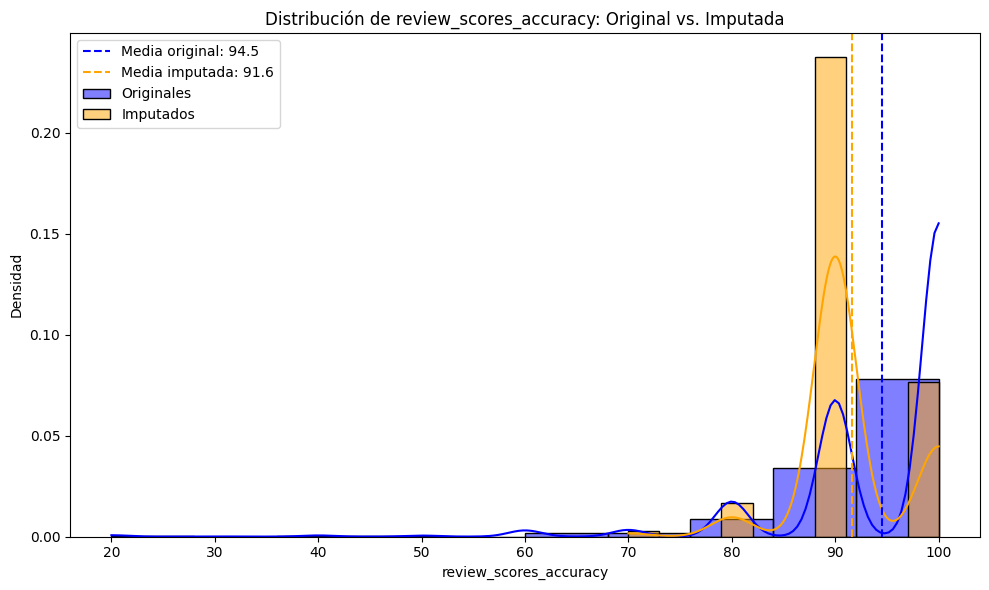

In [50]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_accuracy'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

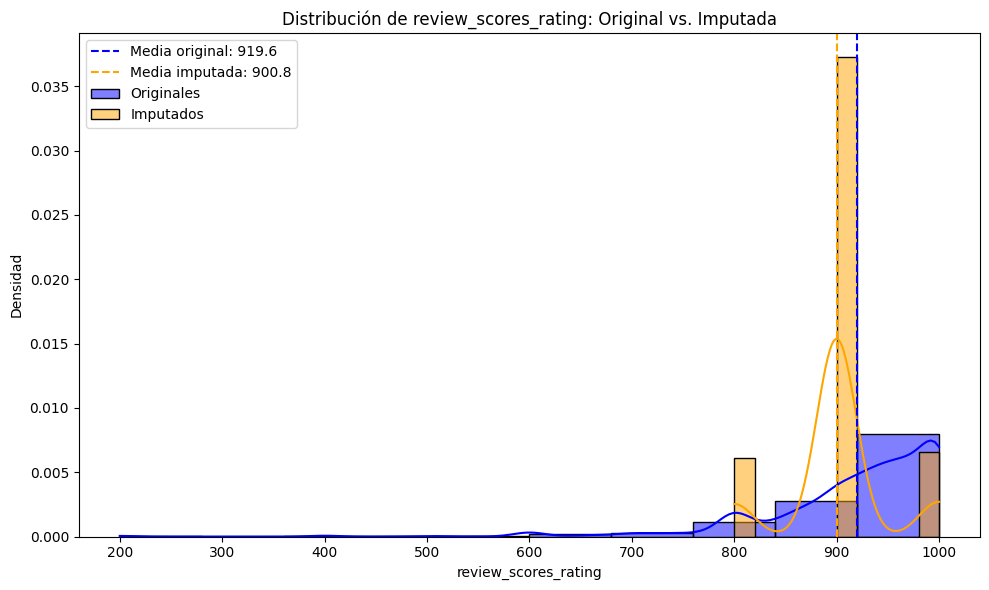

In [51]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_rating'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

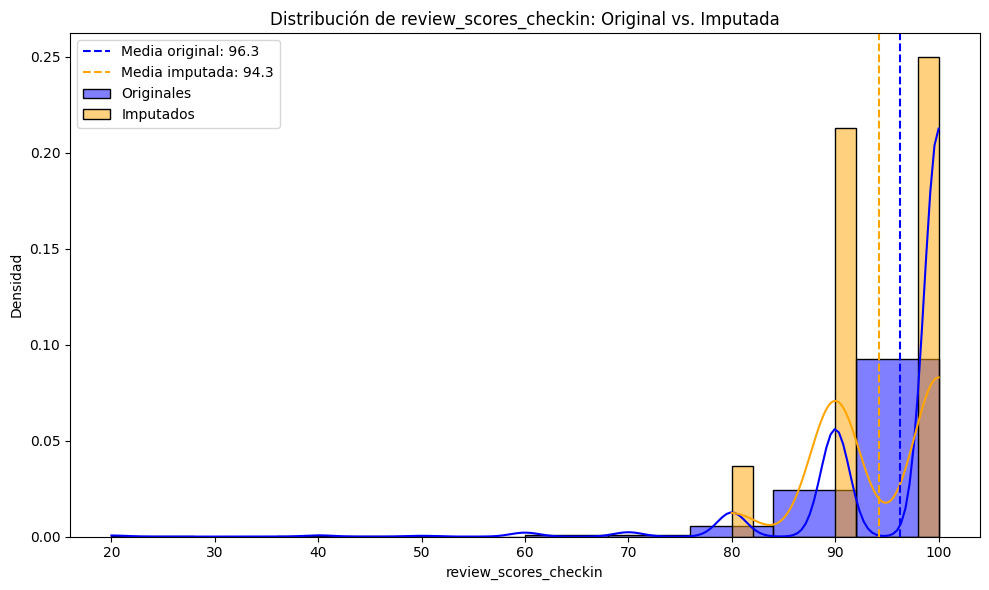

In [52]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_checkin'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

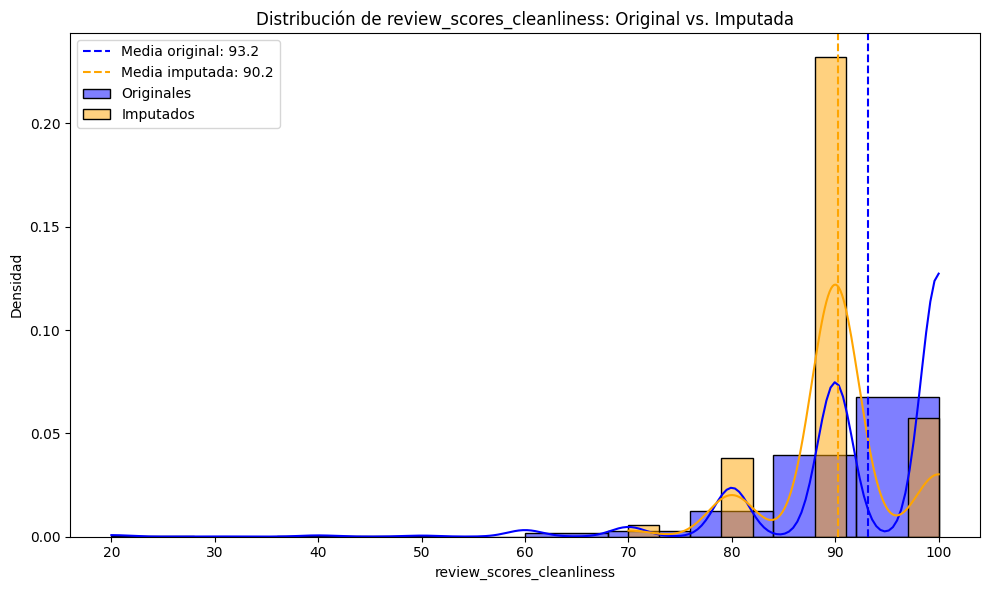

In [54]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_cleanliness'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

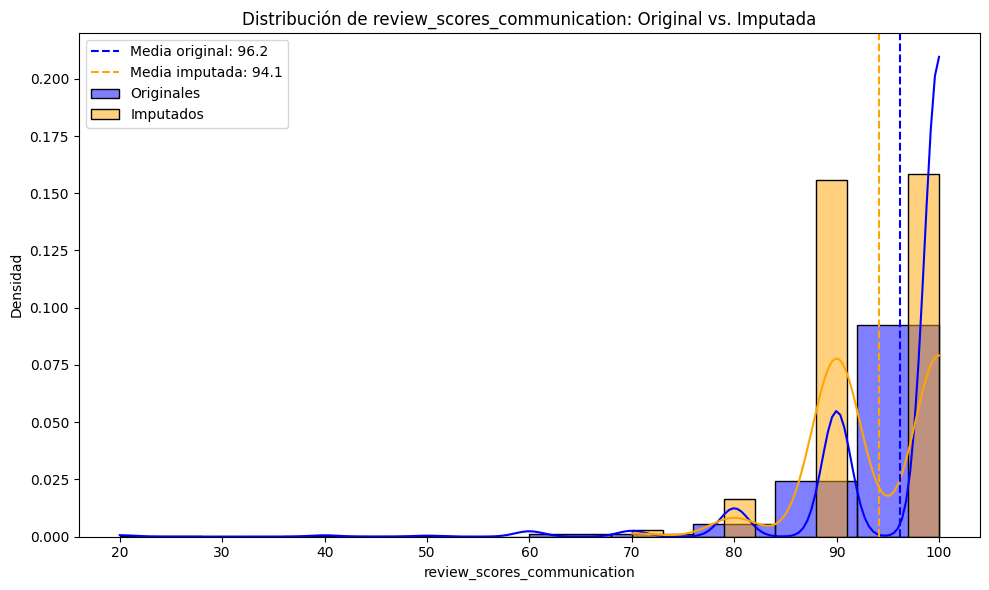

In [55]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_communication'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

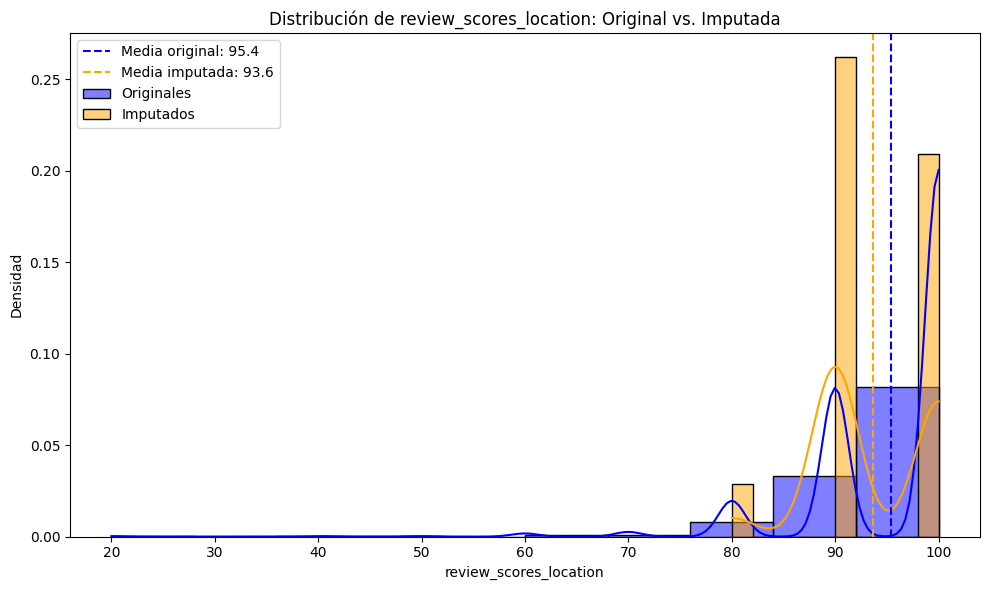

In [56]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_location'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

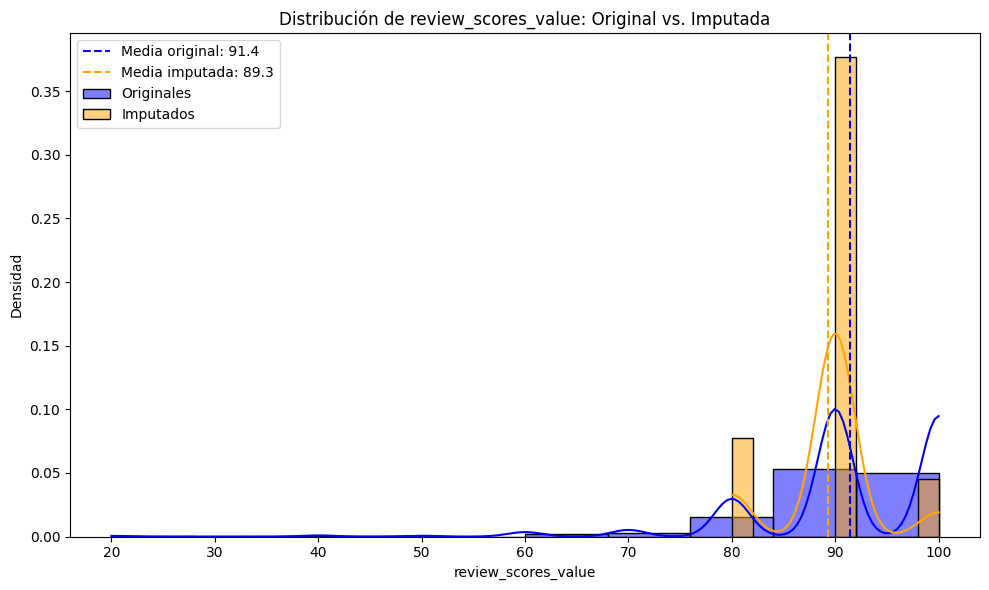

In [57]:
# 9. Visualizar distribución de una variable imputada
col = 'review_scores_value'
original = df.loc[~df.index.isin(y_pred.index), col]
imputed = df.loc[y_pred.index, col]

plt.figure(figsize=(10, 6))
sns.histplot(original, bins=10, kde=True, color='blue', label='Originales', stat='density')
sns.histplot(imputed, bins=10, kde=True, color='orange', label='Imputados', stat='density')
plt.axvline(original.mean(), color='blue', linestyle='--', label=f"Media original: {original.mean():.1f}")
plt.axvline(imputed.mean(), color='orange', linestyle='--', label=f"Media imputada: {imputed.mean():.1f}")
plt.title(f'Distribución de {col}: Original vs. Imputada')
plt.xlabel(col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

#### Frecuencia de reseñas al mes por puntuación

<Axes: xlabel='review_scores_value', ylabel='reviews_per_month'>

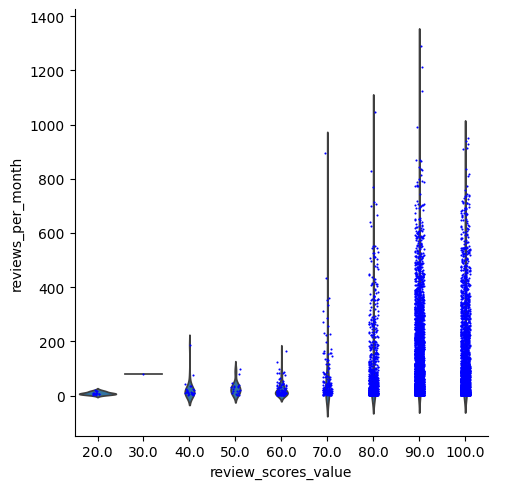

In [45]:
g = sns.catplot(data=df, x='review_scores_value', y='reviews_per_month', kind="violin", inner=None)
sns.stripplot(data=df, x='review_scores_value', y='reviews_per_month', color="b", size=1.5, ax=g.ax)

Text(0.5, 1.0, 'Distribución estadística del rating total por ciudad')

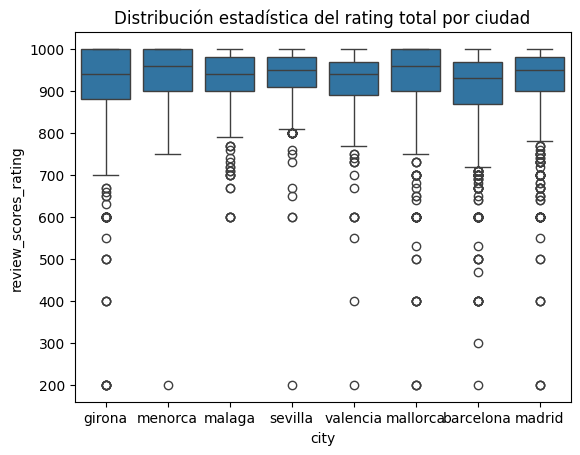

In [17]:
ax = sns.boxplot(data=df, x='city', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por ciudad")

Text(0.5, 1.0, 'Distribución estadística del rating total por tipo de alojamiento')

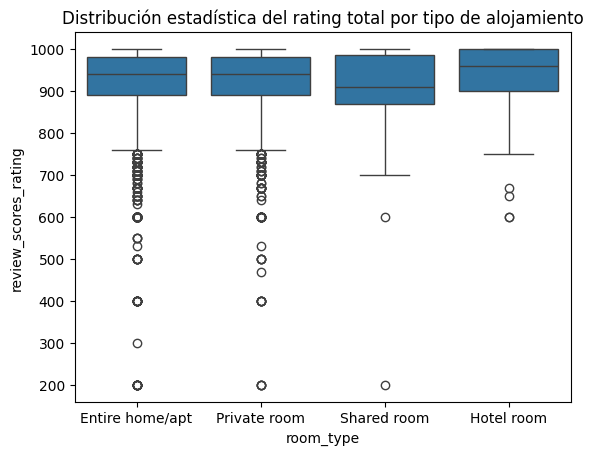

In [18]:
ax = sns.boxplot(data=df, x='room_type', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por tipo de alojamiento")

### Índice de satisfacción general

Después de la imputación

In [46]:
Indice_satisfaccion_general = df['review_scores_value'].sum() / df['apartment_id'].count()

print(f'El índice de satisfacción general es: {Indice_satisfaccion_general:.2f}')

El índice de satisfacción general es: 67.29


In [47]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = Indice_satisfaccion_general,
    title = {'text': "Índice de satisfacción general"},
    delta = {'reference': 71.678,
             'valueformat': '.2f'},
    gauge= {'axis': {'visible': False}},
    number= {'valueformat': '.2f'}
))

fig.show()

## KPI 4 - Ítem con la mayor puntuación promedio

In [23]:
# Diccionario para traducir los nombres de las columnas de evaluación específicas
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Registro',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

# Columnas originales
cols = list(traducciones.keys())

# Calcular la media de cada una (ignorando NaN)
mean_scores = df[cols].mean().rename(traducciones)

print(mean_scores)

# Mostrar la métrica con mayor media
max_metric = mean_scores.idxmax()
max_value = mean_scores.max()

print(f"La métrica con la mayor puntuación promedio es: {max_metric} con un valor de {max_value:.2f}")

Precisión         94.501718
Limpieza          93.137339
Registro          96.248746
Comunicaciones    96.217802
Ubicación         95.429923
dtype: float64
La métrica con la mayor puntuación promedio es: Registro con un valor de 96.25


Representación gráfica

[Text(0, 0, '93.14'),
 Text(0, 0, '94.50'),
 Text(0, 0, '95.43'),
 Text(0, 0, '96.22'),
 Text(0, 0, '96.25')]

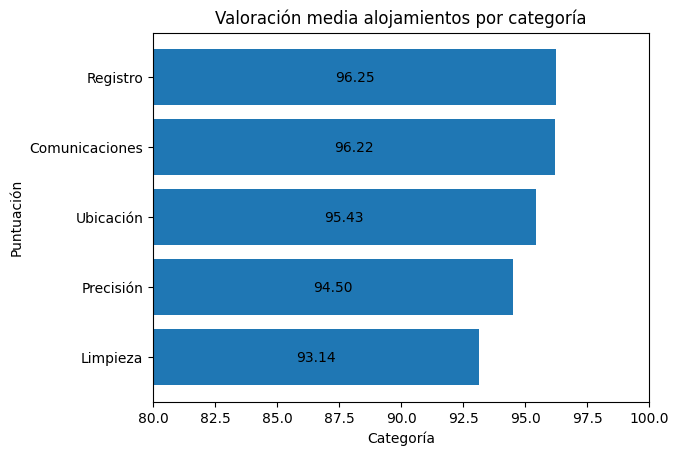

In [24]:
mean_sorted = mean_scores.sort_values(ascending=True)
plt.barh(mean_sorted.index, mean_sorted.values)
plt.xlim(80, 100)
plt.xlabel('Categoría')
plt.ylabel('Puntuación')
plt.title('Valoración media alojamientos por categoría')
plt.bar_label(plt.gca().containers[0], fmt='%.2f', label_type='center')

Gráfica de radar para representar las puntuaciones

In [25]:
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=mean_scores.values, theta=mean_scores.index, range_r=(90, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=mean_scores.values,
    theta=mean_scores.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=mean_scores.values.round(2),
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_value],
    theta=[max_metric],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

### Respuestas de negocio

#### Sprint 01

Puntuación media de los usuarios

In [26]:
media_valor = df['review_scores_value'].mean()
print(f"Puntuación media otorgada por los usuarios: {media_valor:.2f}")

Puntuación media otorgada por los usuarios: 91.51


In [28]:
fig = go.Figure(go.Indicator(
    mode = "number+gauge",
    gauge = {'shape': "bullet", 
             'axis': {'visible': False}},
    delta = {'reference': 100}, #Aunque la referencia no es necesaria si no ponemos el tope
    value = media_valor,
    domain = {'x': [0.2, 1], 'y': [0.2, 0.9]},
    title = {'text': "Puntuación media general",
             'align': 'right'},
    number= {'valueformat': '.2f'}))

fig.show()

 Porcentaje de alojamientos por ciudad que superan una puntuación de 80

In [29]:

# Crear una columna booleana para marcar los que superan 80
df['supera_80'] = df['review_scores_value'] > 80

# Agrupar por ciudad y calcular el porcentaje
porcentaje_por_ciudad = (
    df.groupby('city')['supera_80']
    .mean().sort_values(ascending=False) * 100
).round(2)

print(pd.DataFrame(porcentaje_por_ciudad))


           supera_80
city                
sevilla        79.55
valencia       73.29
malaga         70.58
madrid         67.28
barcelona      62.28
menorca        53.00
mallorca       51.52
girona         47.98


In [30]:
porcentaje_por_ciudad.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, sevilla to girona
Series name: supera_80
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


In [31]:
porcentaje_por_ciudad = pd.DataFrame(porcentaje_por_ciudad)
porcentaje_por_ciudad.info()
                                     

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sevilla to girona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   supera_80  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_5262/1923502712.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




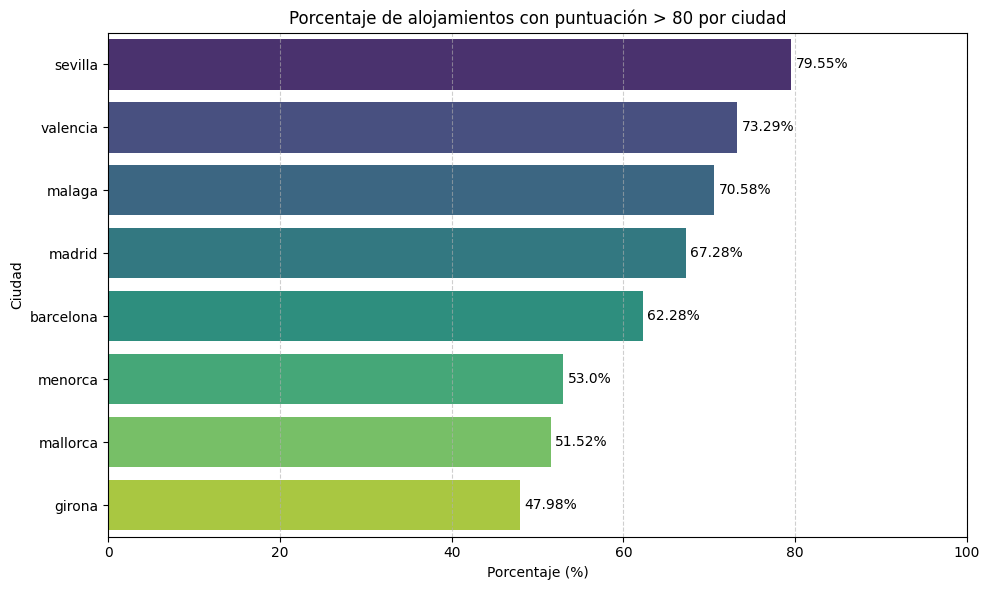

In [32]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentaje_por_ciudad, x='supera_80', y='city', palette='viridis')

# Anotar porcentajes
for index, row in porcentaje_por_ciudad.iterrows():
    plt.text(row['supera_80'] + 0.5, index, f"{row['supera_80']}%", va='center')

# Ajustes visuales
plt.title('Porcentaje de alojamientos con puntuación > 80 por ciudad')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Ciudad')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Sprint 02

¿Qué aspectos (precisión, higiene, registro o comunicaciones) presentan mayores diferencias entre los alojamientos mejor y peor valorados en la evaluación general? 

In [33]:
cols.remove('review_scores_location')
print(cols)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']


In [34]:
# Eliminar filas con valores nulos en estas columnas y en la puntuación global
df_clean = df.dropna(subset=cols + ['review_scores_value'])

df_clean

apartment_id                                               name  \
0         15248525     appt dans villa � Llansa ,beau jardin,terrasse   
2         32088176  Two-level apartment, wifi, terrace, swimming pool   
4         43993521  Apartment Sant Lluis,2 minutes walk from the b...   
6          1160633                     Attic close Llan�� Beach. Wifi   
9         18263766              Apartamento 1a linea mar con parquing   
...            ...                                                ...   
9626      14999488             Habitaci�n doble en bonito apartamento   
9627      11411444                Cute apartment close to Pg.Gr�cia a   
9628      13707226              Remarkable Value, Unbeatable Location   
9630        544995                 LUXURY HOUSE IN BCN NEAR THE BEACH   
9632      13166575                            Olivia Luxury Apartment   

                                            description    host_id  \
0     Mon logement est proche de la plage et des com...   84213236   
2     Authentic 2 level apartment, located on the su...  240662122   
4     Apartments located in the central part of Llor...   59318446   
6     Beautiful penthouse in the center of Port de L...    2816160   
9     Apartamento de 90 m2, primera l�nea de mar, en...  126077779   
...                                                 ...        ...   
9626  Piso grande y bonito de 90 m2. Tranquilo y por...    7093663   
9627  Cute apartment in Gracia!  near Metro Diagonal...   14368366   
9628  A spacious double bedroom with a balcony. It's...   80008404   
9630  SPECIAL OFFER! LUXURY HOUSE IN BCN NEAR THE BE...    2556699   
9632  Bright 85 m2 apartment with 2 double bedroom a...   10249776   

                      neighbourhood_name neighbourhood_district  \
0                                 Llan��                    NaN   
2                          Lloret de Mar                    NaN   
4                          Lloret de Mar                    NaN   
6                                 Llan��                    NaN   
9                   Castell-Platja d'Aro                    NaN   
...                                  ...                    ...   
9626  el Camp d'en Grassot i Gr�cia Nova                 Gr�cia   
9627                   la Vila de Gr�cia                 Gr�cia   
9628                      el Barri G�tic           Ciutat Vella   
9630       la Vila Ol�mpica del Poblenou             Sant Mart�   
9632              la Dreta de l'Eixample               Eixample   

            room_type  accommodates  bathrooms  bedrooms  ...  \
0     Entire home/apt             6        1.0       2.0  ...   
2     Entire home/apt             4        1.0       1.0  ...   
4     Entire home/apt             6        1.0       2.0  ...   
6     Entire home/apt             6        1.0       2.0  ...   
9     Entire home/apt             6        2.0       3.0  ...   
...               ...           ...        ...       ...  ...   
9626     Private room             2        1.0       1.0  ...   
9627  Entire home/apt             2        1.0       1.0  ...   
9628     Private room             2        4.0       1.0  ...   
9630  Entire home/apt             6        3.0       3.0  ...   
9632  Entire home/apt             4        2.0       2.0  ...   

      reviews_per_month country       city  insert_date  \
0                  66.0   spain     girona   2021-02-27   
2                  57.0   spain     girona   2021-02-27   
4                  29.0   spain     girona   2021-02-27   
6                  28.0   spain     girona   2021-02-27   
9                 101.0   spain     girona   2021-02-27   
...                 ...     ...        ...          ...   
9626               65.0   spain  barcelona   2017-01-04   
9627              147.0   spain  barcelona   2017-01-04   
9628               25.0   spain  barcelona   2017-01-04   
9630               39.0   spain  barcelona   2017-01-04   
9632               34.0   spain  barcelona   2017-01-

In [35]:
df_mediana = df_clean.groupby('review_scores_value')[cols].median().reset_index()
df_mediana

review_scores_value  review_scores_accuracy  review_scores_cleanliness  \
0                 20.0                    20.0                       20.0   
1                 30.0                    50.0                       80.0   
2                 40.0                    60.0                       60.0   
3                 50.0                    70.0                       60.0   
4                 60.0                    80.0                       80.0   
5                 70.0                    80.0                       80.0   
6                 80.0                    90.0                       90.0   
7                 90.0                   100.0                       90.0   
8                100.0                   100.0                      100.0   

   review_scores_checkin  review_scores_communication  
0                   60.0                         60.0  
1                   40.0                         50.0  
2                   80.0                         80.0  
3                   80.0                         80.0  
4                   90.0                         80.0  
5                   90.0                         90.0  
6                   90.0                         90.0  
7                  100.0                        100.0  
8                  100.0                        100.0

In [36]:
max_review_value = df_mediana['review_scores_value'].max()
print(max_review_value)

100.0


In [37]:
min_review_value = df_mediana['review_scores_value'].min()
print(min_review_value)

20.0


In [38]:


# Identificar el alojamiento mejor y peor valorado
mejor = df_mediana.loc[df_mediana['review_scores_value'].idxmax()]
peor = df_mediana.loc[df_mediana['review_scores_value'].idxmin()]

print(mejor)
print(peor)


review_scores_value            100.0
review_scores_accuracy         100.0
review_scores_cleanliness      100.0
review_scores_checkin          100.0
review_scores_communication    100.0
Name: 8, dtype: float64
review_scores_value            20.0
review_scores_accuracy         20.0
review_scores_cleanliness      20.0
review_scores_checkin          60.0
review_scores_communication    60.0
Name: 0, dtype: float64


In [39]:

# Calcular diferencias
diferencias = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)

print(diferencias)


Registro          40.0
Comunicaciones    40.0
Precisión         80.0
Limpieza          80.0
dtype: float64


El aspecto con la valoración más dispar es: Precisión con una diferencia de 80.00 puntos


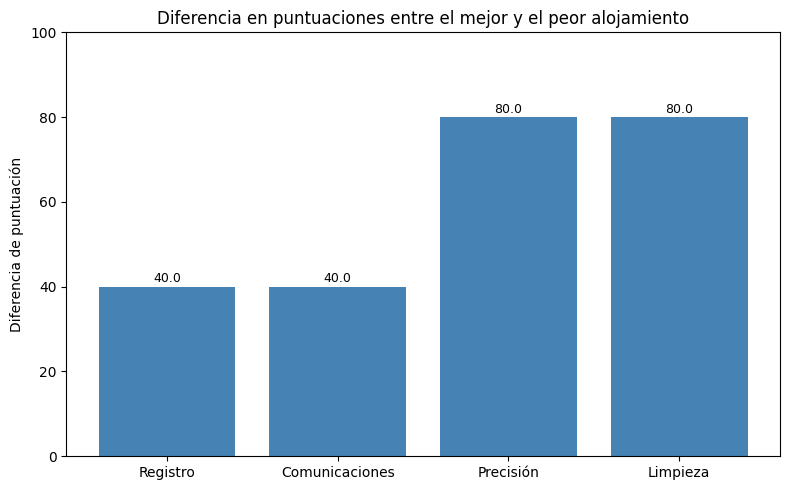

In [40]:

max_item = diferencias.idxmax()
max_diferencia = diferencias.max()

print(f"El aspecto con la valoración más dispar es: {max_item} con una diferencia de {max_diferencia:.2f} puntos")

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(diferencias.index, diferencias.values, color='steelblue')
plt.title('Diferencia en puntuaciones entre el mejor y el peor alojamiento', fontsize=12)
plt.ylabel('Diferencia de puntuación')
plt.ylim(0, 100)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()


In [41]:
# Gráfica de radar plotly
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=diferencias.values, theta=diferencias.index, range_r=(0, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=diferencias.values,
    theta=diferencias.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=diferencias.values,
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_diferencia],
    theta=[max_item],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

Segmentamos por ciudad

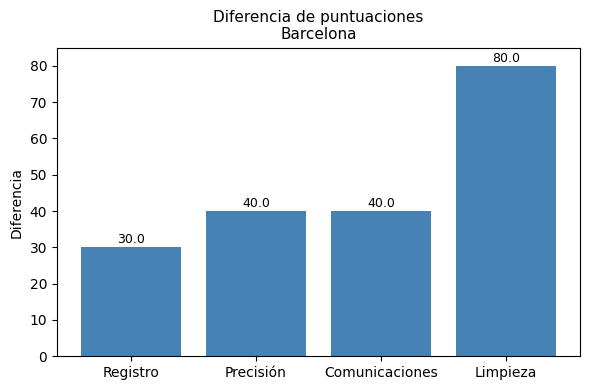

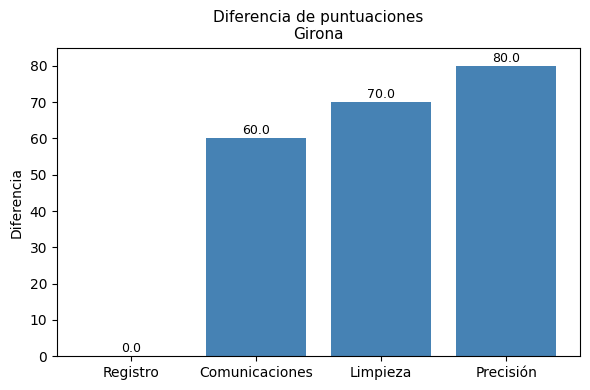

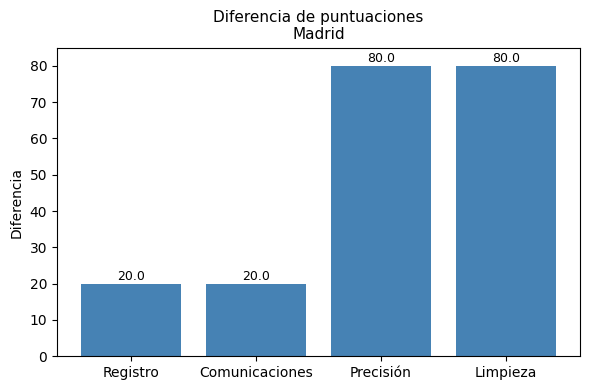

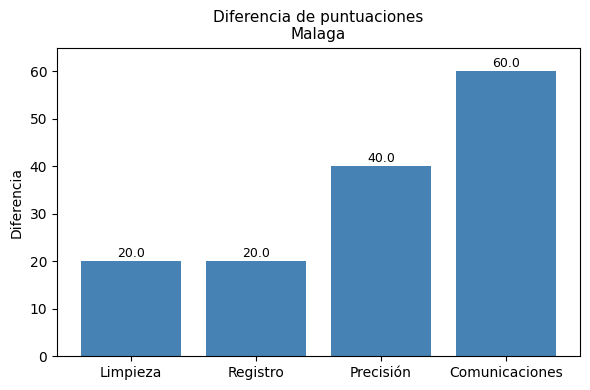

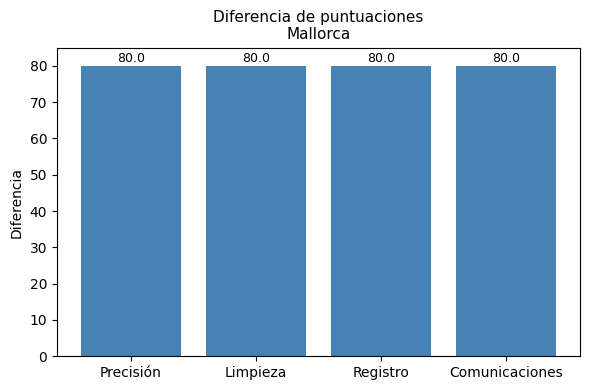

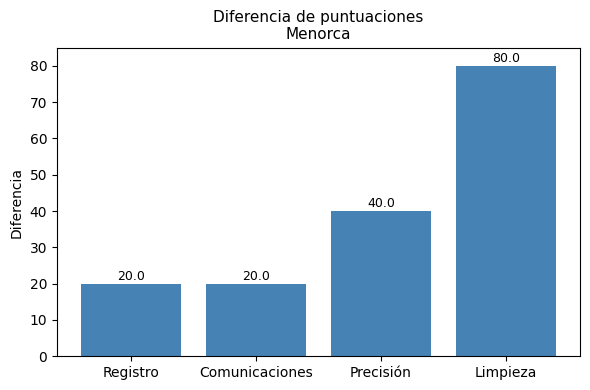

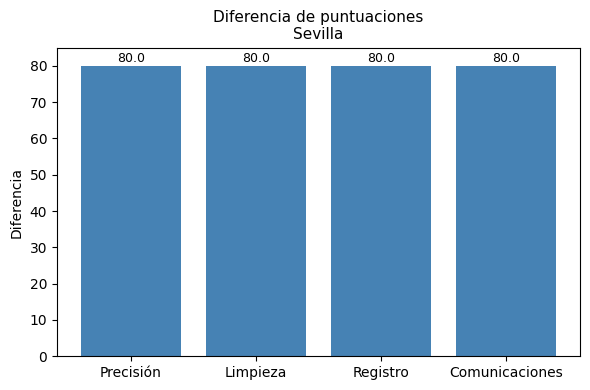

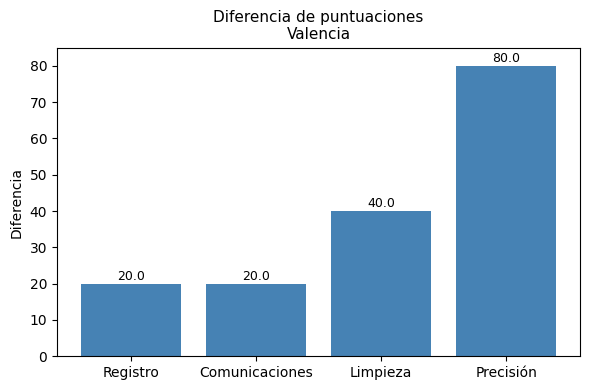

In [42]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'city'])

# Agrupar solo por ciudad
grouped = df_clean.groupby('city')

# Crear gráfico por ciudad
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{city.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()


In [43]:
# Para cada ciudad, generar un gráfico de radar
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])
    
    # Datos para resaltar el valor máximo
    max_item = diferencias.idxmax().replace('review_scores_', '').capitalize()
    max_diferencia = diferencias.max()

    # Convertir índices para visualización
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()

    # Crear figura polar (radar)
    fig = px.line_polar(
        r=diferencias.values,
        theta=theta_labels,
        range_r=(0, max(diferencias.values) + 5),
        line_close=True,
        title=f"Diferencia de puntuaciones entre el mejor y peor alojamiento en {city}"
    )
    fig.update_traces(fill='toself')

    # Añadir puntos y valores
    fig.add_trace(go.Scatterpolar(
        r=diferencias.values,
        theta=theta_labels,
        mode='markers+text',
        marker=dict(color='blue', size=5, symbol='circle'),
        text=[f'{v:.1f}' for v in diferencias.values],
        textposition='top center',
        name='Valores',
        showlegend=False
    ))

    # Marcar el valor máximo
    fig.add_trace(go.Scatterpolar(
        r=[max_diferencia],
        theta=[max_item],
        mode='markers',
        marker=dict(color='red', size=10, symbol='circle'),
        name='Valor máximo',
        showlegend=False
    ))

    fig.show()

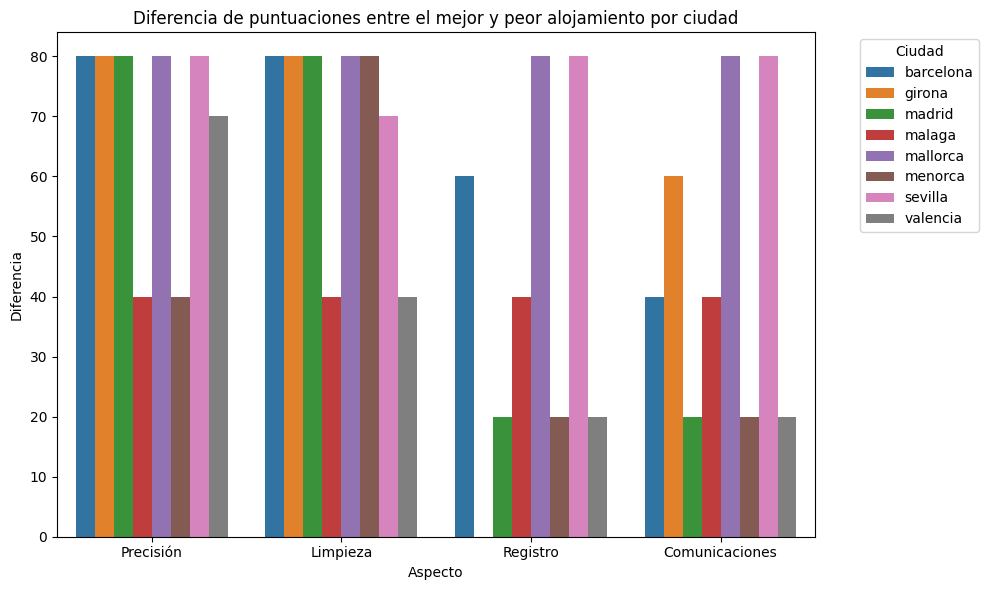

In [44]:
#Gráfica de barras apilada

#Agrupar por ciudad y calcular diferencias
records = []
for city, group in df_clean.groupby('city'):
    mejor = group.loc[group['review_scores_rating'].idxmax()]
    peor = group.loc[group['review_scores_rating'].idxmin()]
    diferencias = (mejor[cols] - peor[cols]).rename(traducciones)
    for aspecto, valor in diferencias.items():
        records.append({
            'Ciudad': city,
            'Aspecto': aspecto,
            'Diferencia': valor
        })

# Crear DataFrame en formato largo
long_df = pd.DataFrame(records)

# Crear gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Aspecto', y='Diferencia', hue='Ciudad')

# Ajustes estéticos
plt.title("Diferencia de puntuaciones entre el mejor y peor alojamiento por ciudad")
plt.ylabel("Diferencia")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Segmentamos por tipo de alojamiento

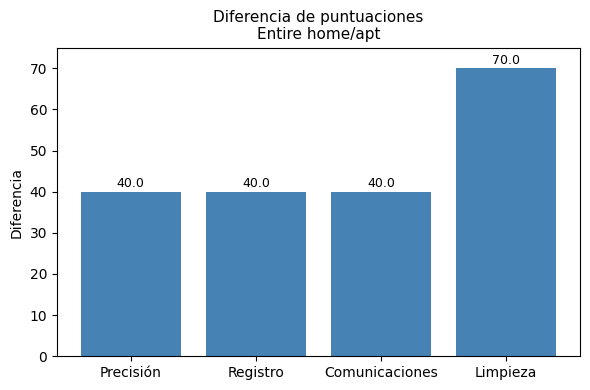

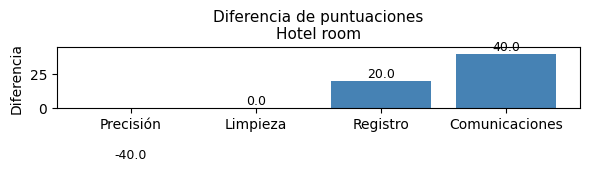

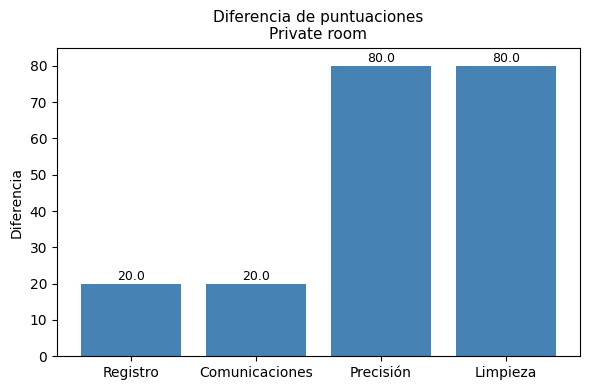

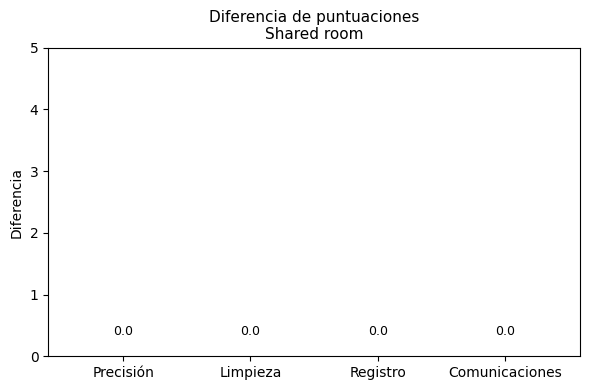

In [45]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'room_type'])

# Agrupar solo por tipo de alojamiento
grouped = df_clean.groupby('room_type')

# Crear gráfico por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{room_type.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

In [46]:
# Para cada tipo de alojamiento, generar un gráfico de radar
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])
    
    # Datos para resaltar el valor máximo
    max_item = diferencias.idxmax().replace('review_scores_', '').capitalize()
    max_diferencia = diferencias.max()

    # Convertir índices para visualización
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()

    # Crear figura polar (radar)
    fig = px.line_polar(
        r=diferencias.values,
        theta=theta_labels,
        range_r=(0, max(diferencias.values) + 5),
        line_close=True,
        title=f"Diferencia de puntuaciones entre el mejor y peor alojamiento en {room_type}"
    )
    fig.update_traces(fill='toself')

    # Añadir puntos y valores
    fig.add_trace(go.Scatterpolar(
        r=diferencias.values,
        theta=theta_labels,
        mode='markers+text',
        marker=dict(color='blue', size=5, symbol='circle'),
        text=[f'{v:.1f}' for v in diferencias.values],
        textposition='top center',
        name='Valores',
        showlegend=False
    ))

    # Marcar el valor máximo
    fig.add_trace(go.Scatterpolar(
        r=[max_diferencia],
        theta=[max_item],
        mode='markers',
        marker=dict(color='red', size=10, symbol='circle'),
        name='Valor máximo',
        showlegend=False
    ))

    fig.show()

In [47]:
# Todos los trazos en el mismo gráfico de radas
# Inicializar figura
fig = go.Figure()

# Añadir una traza por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])

    # Etiquetas más limpias
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()
    r_values = diferencias.values

    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=theta_labels,
        fill='toself',
        name=room_type,
        mode='lines+markers',
        opacity=0.6  # Mejora la legibilidad al superponer
    ))

# Configuración del gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_clean[cols].max().max()]
        )
    ),
    title="Comparativa de diferencias de puntuaciones entre el mejor y peor alojamiento por tipo de alojamiento",
    showlegend=True
)

fig.show()


Segmentado por ciudad y tipo de alojamiento

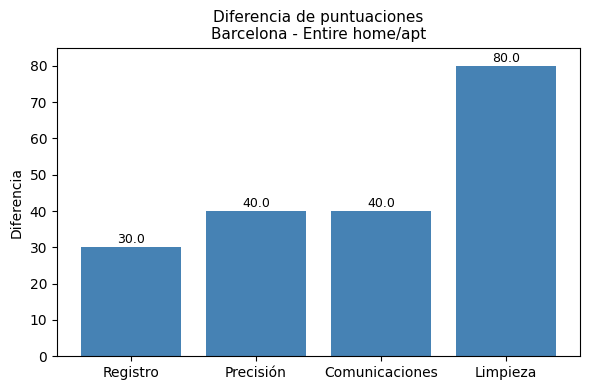

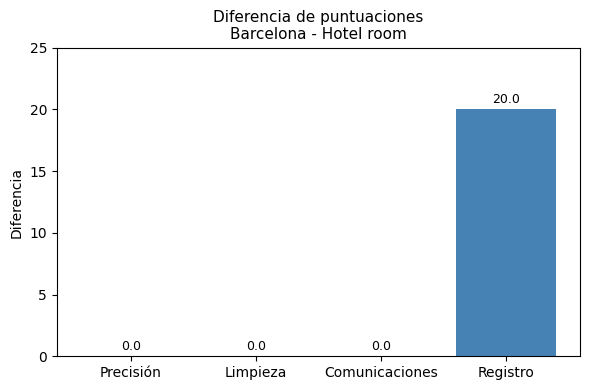

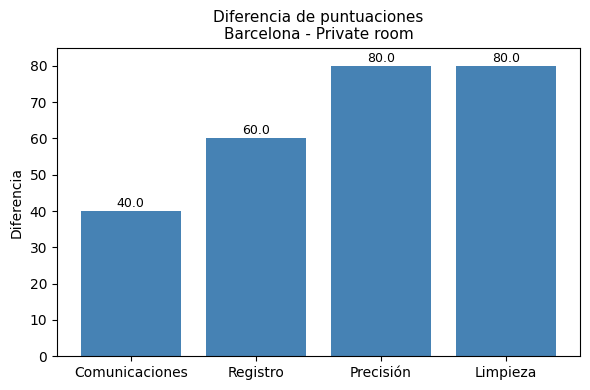

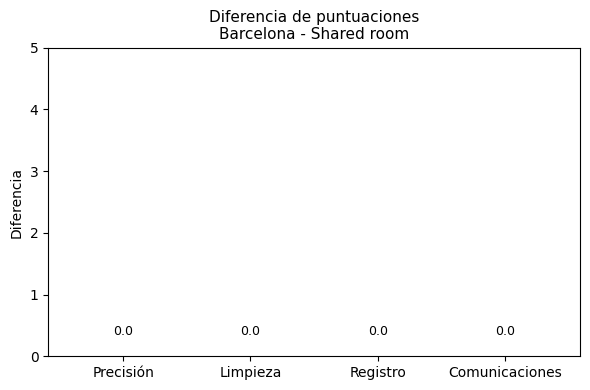

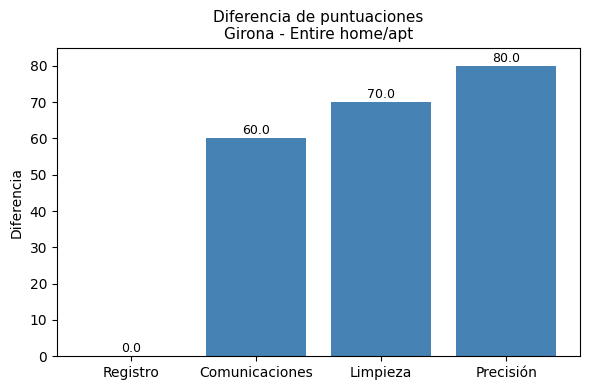

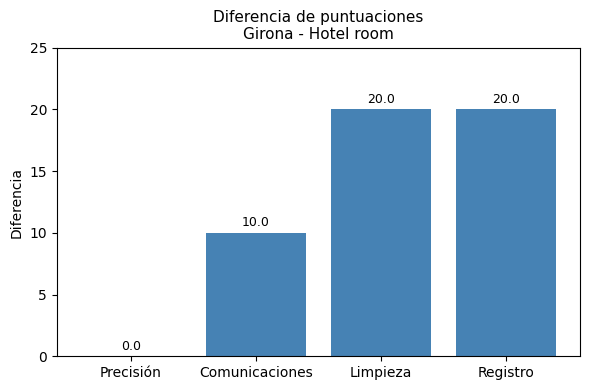

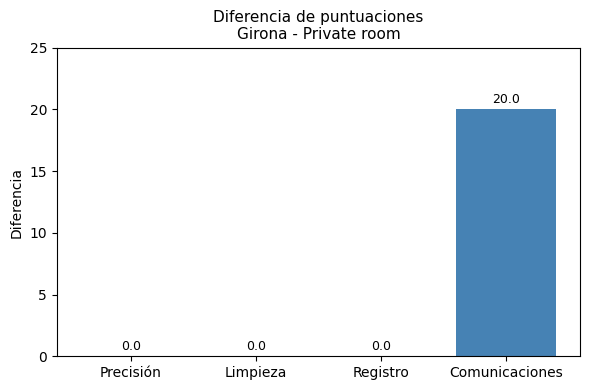

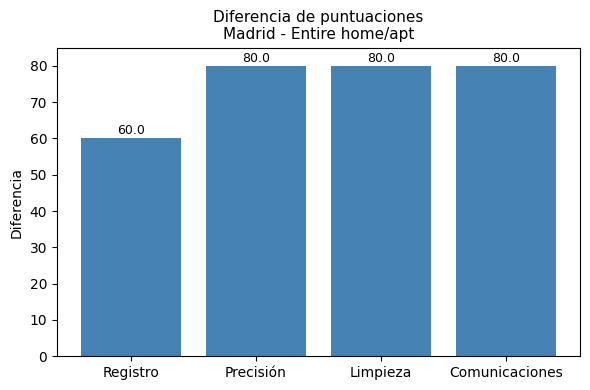

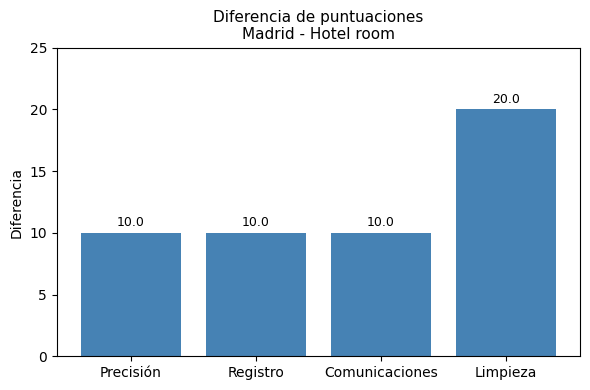

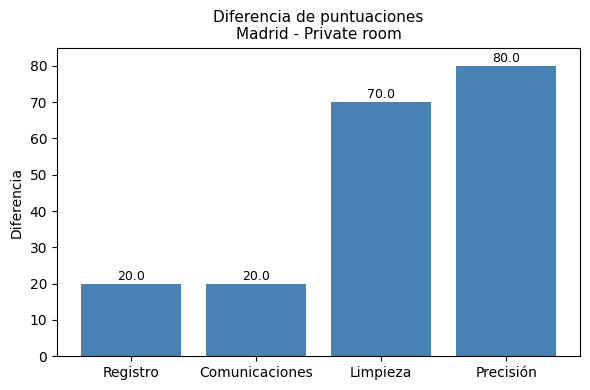

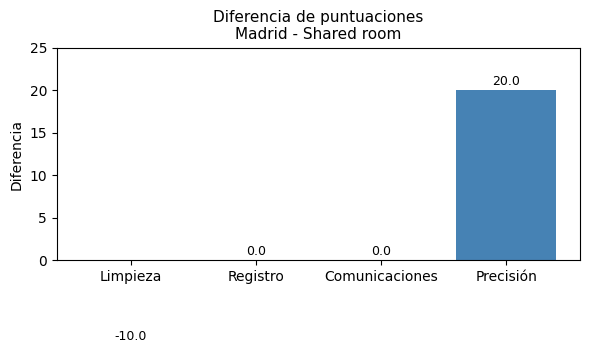

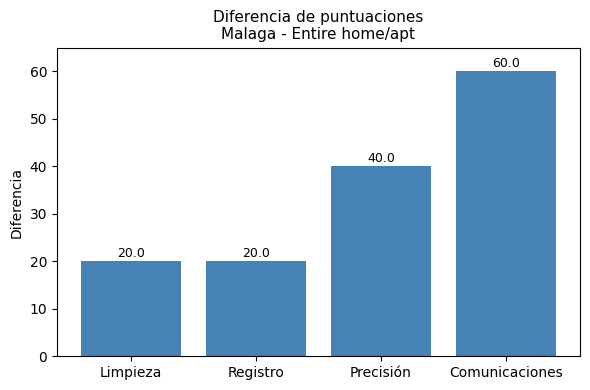

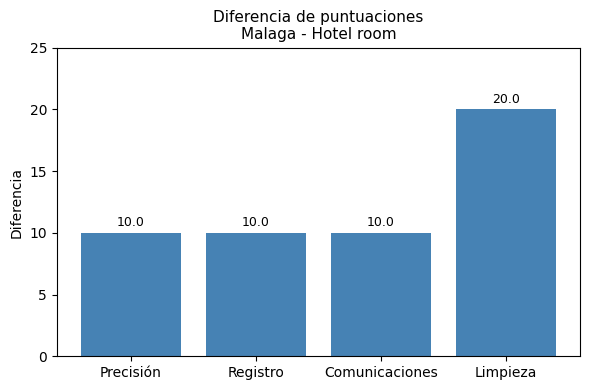

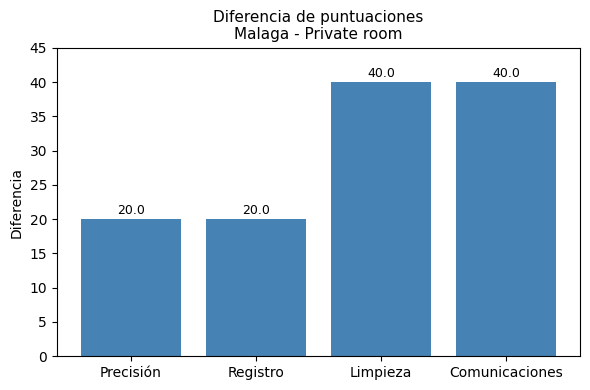

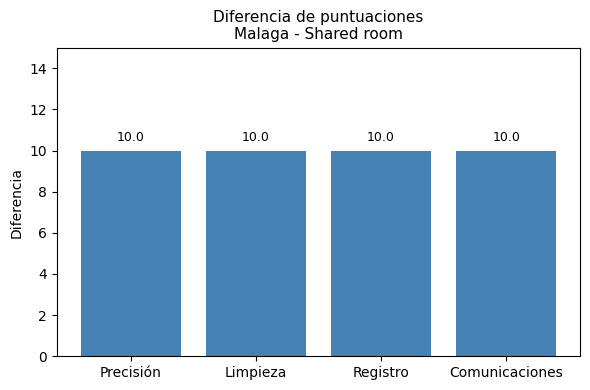

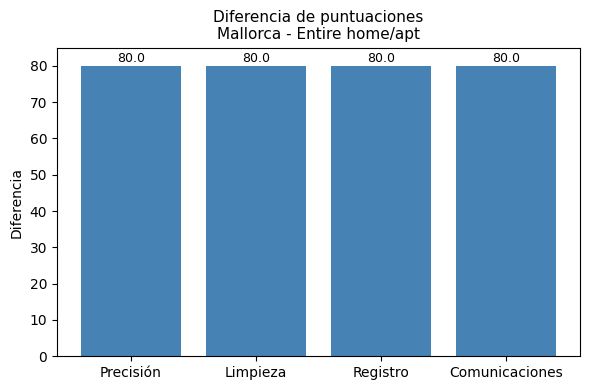

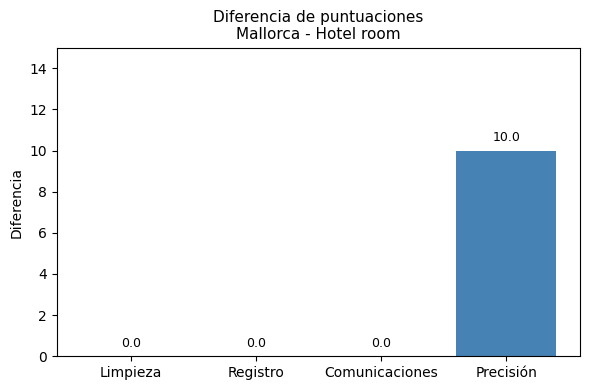

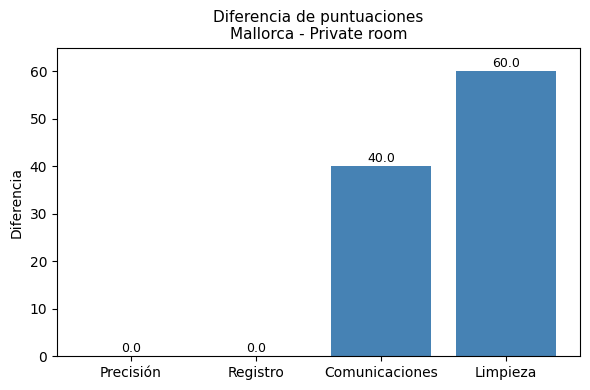

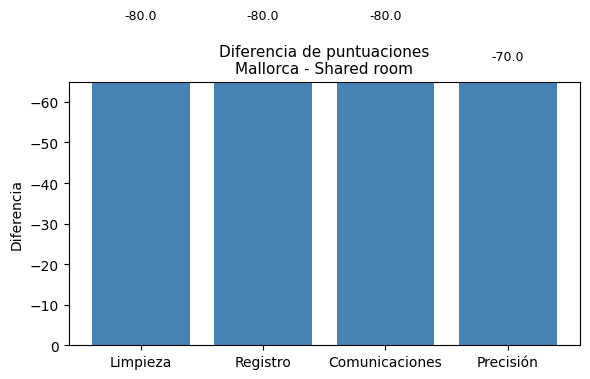

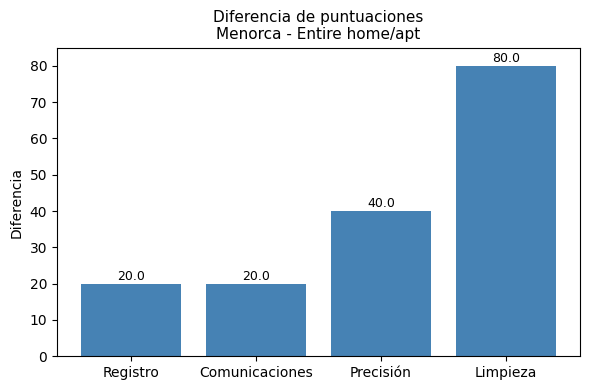

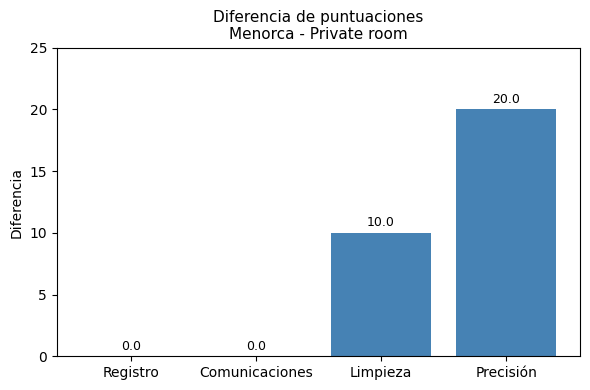

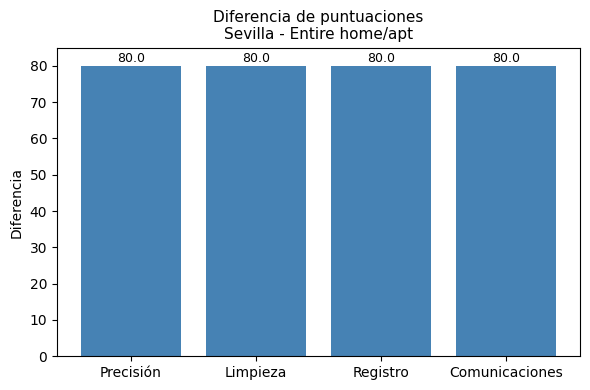

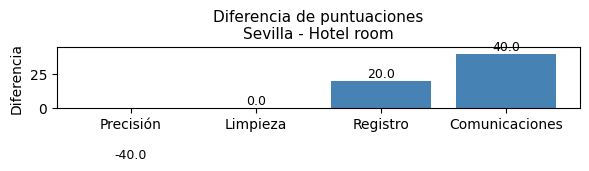

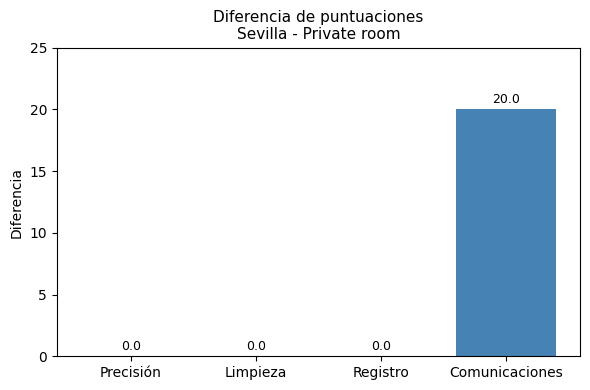

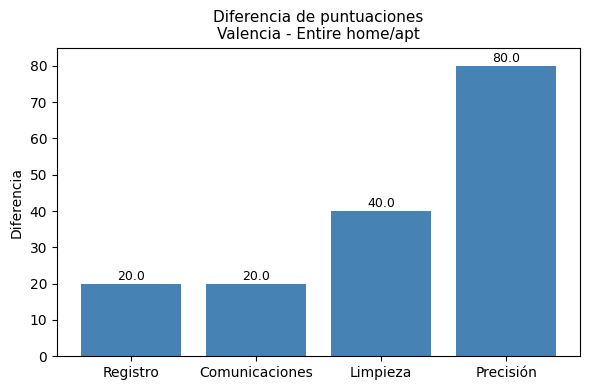

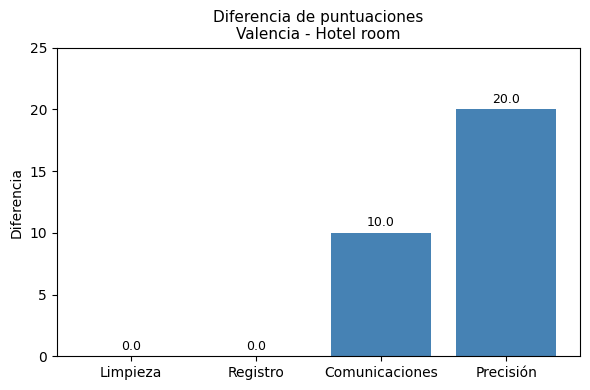

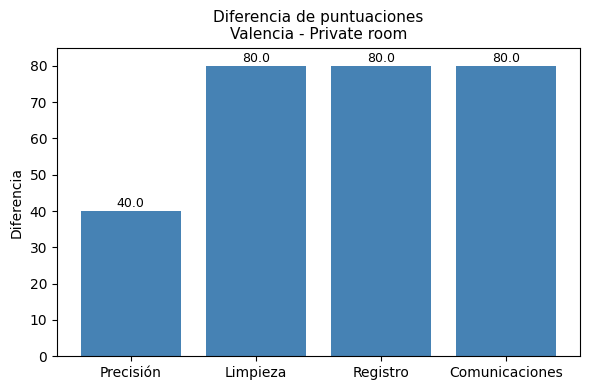

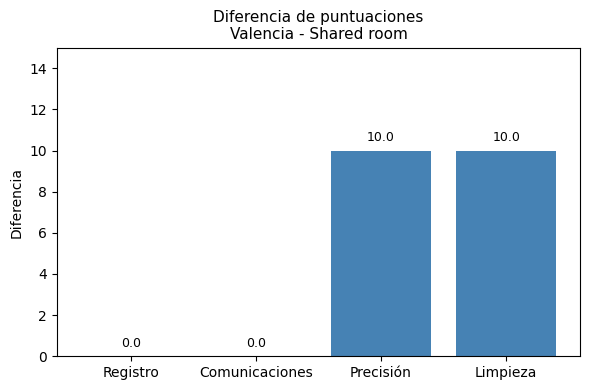

In [48]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'city', 'room_type'])

# Agrupar por ciudad y tipo de habitación
grouped = df_clean.groupby(['city', 'room_type'])

# Crear gráfico por grupo
for (city, room_type), group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{city.capitalize()} - {room_type}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()


Vamos a segmentar por ciudad y tipo de alojamiento

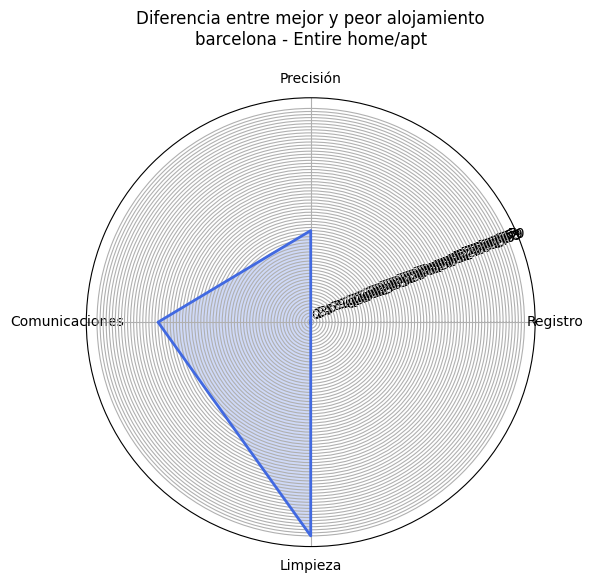

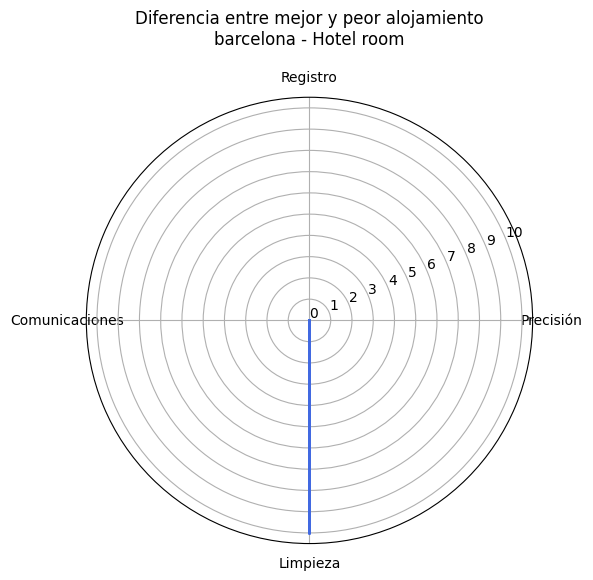

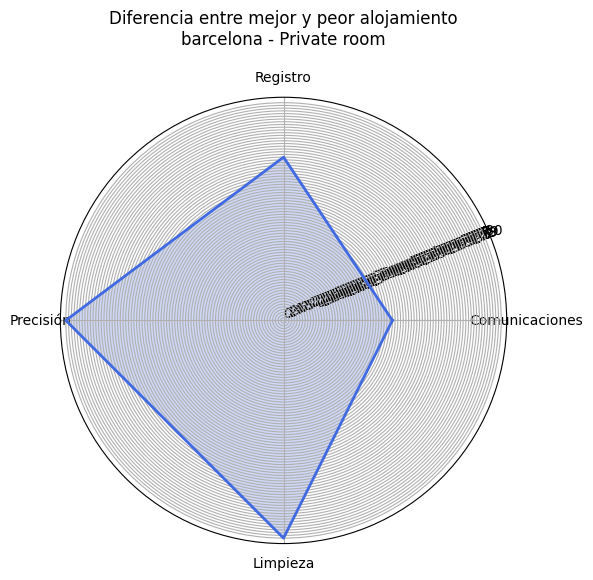

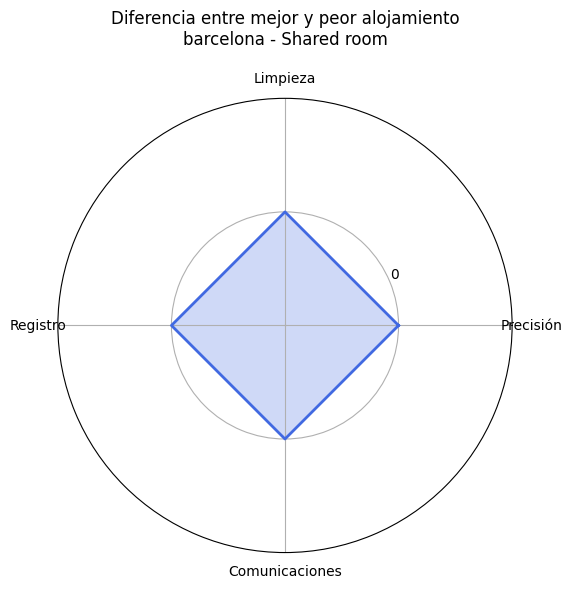

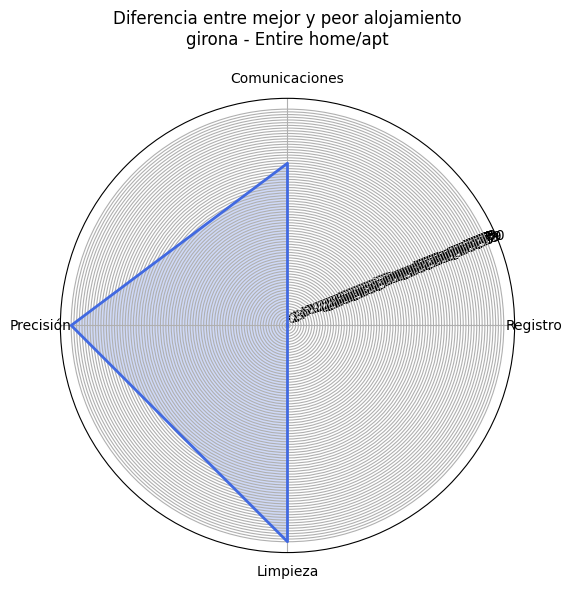

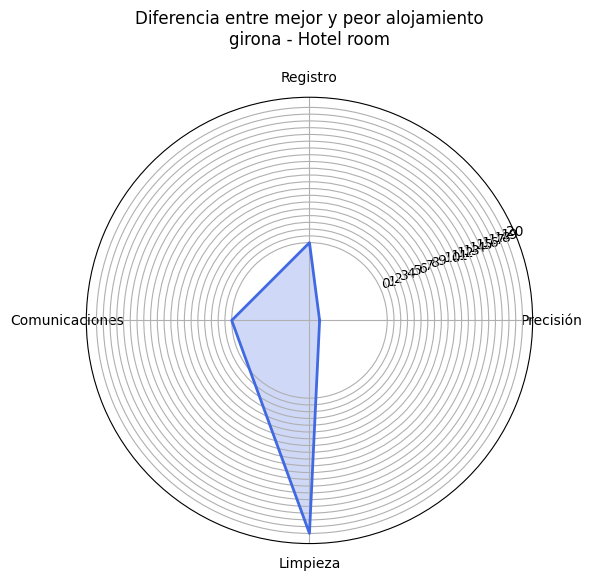

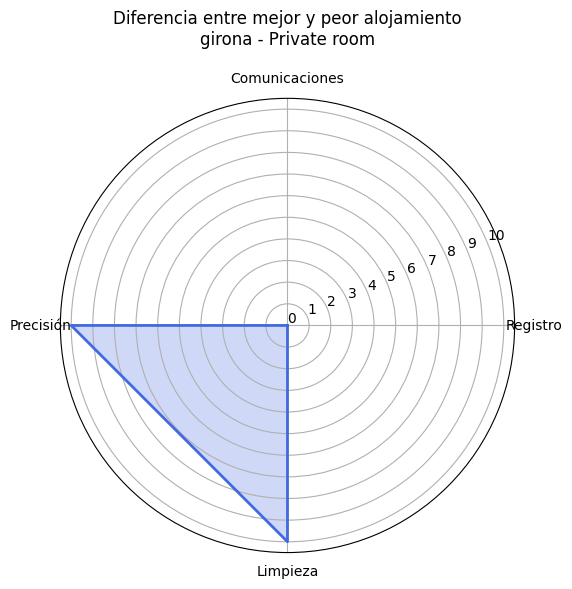

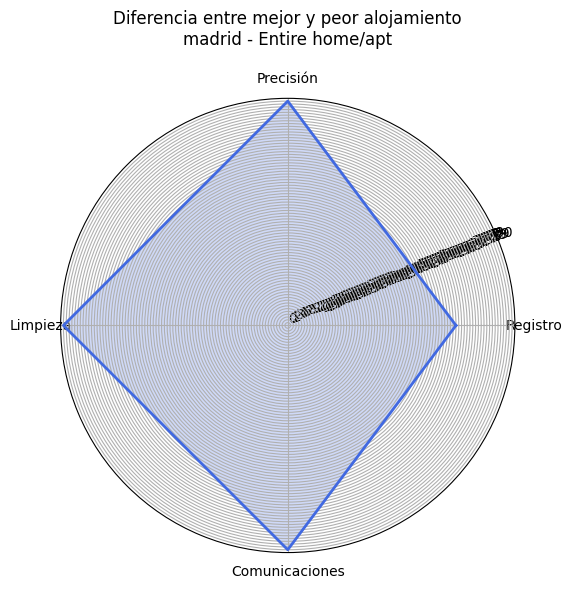

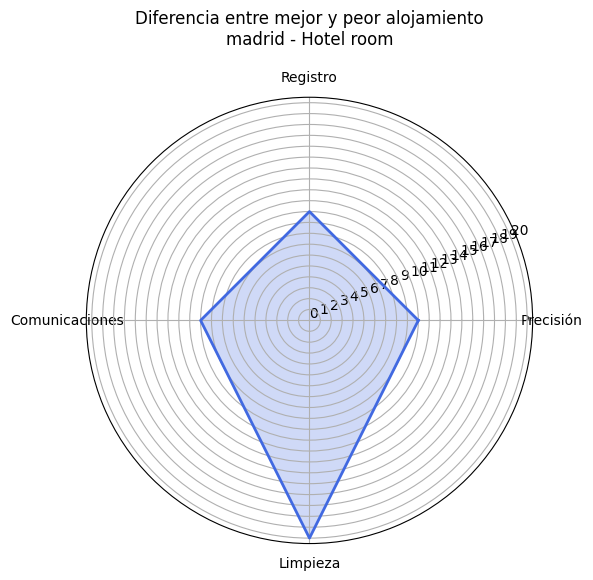

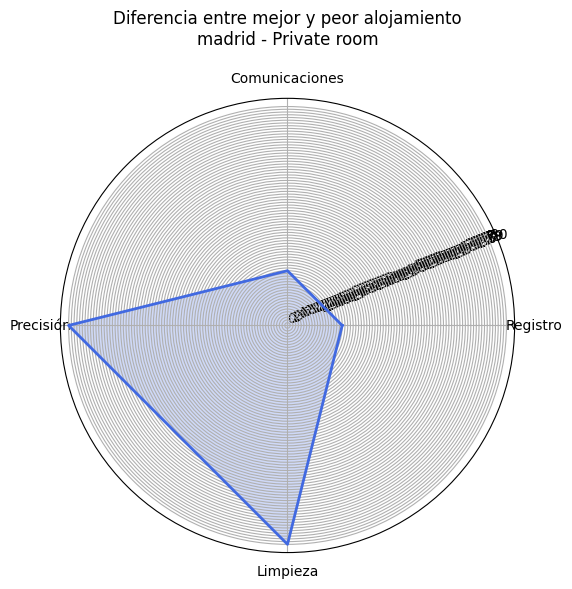

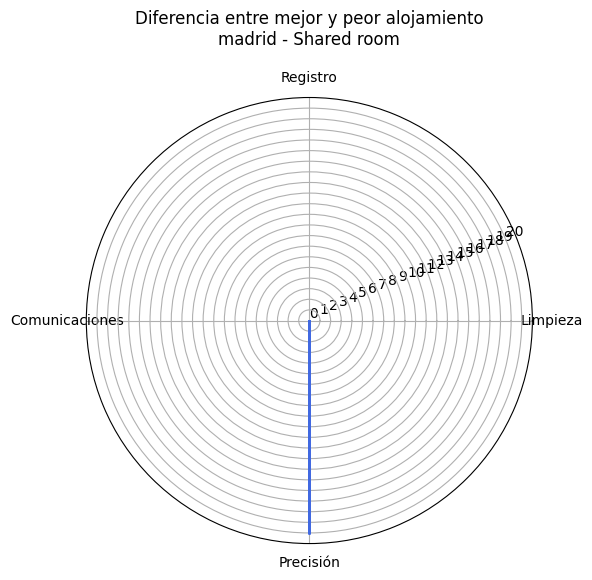

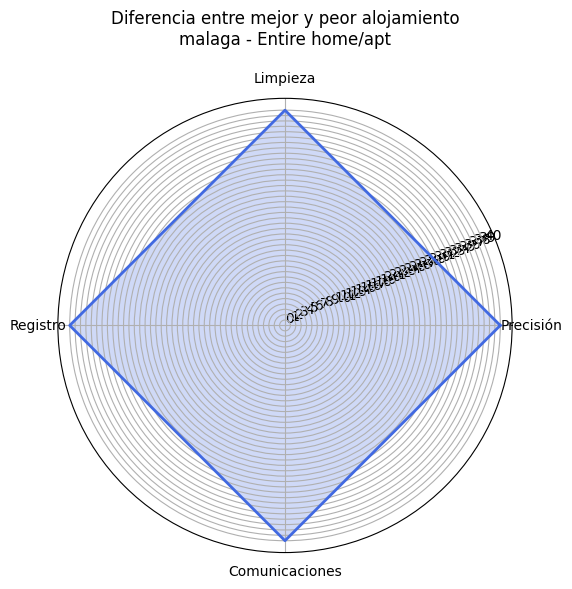

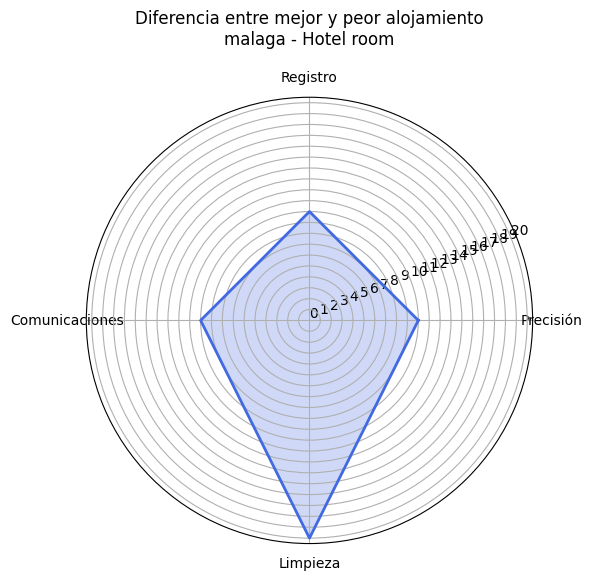

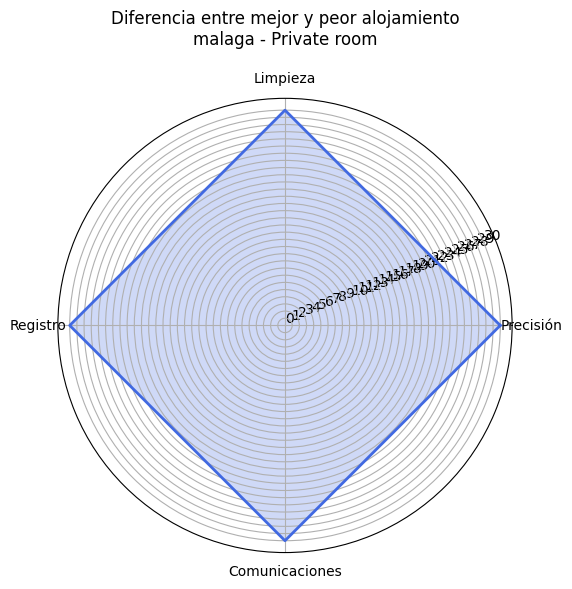

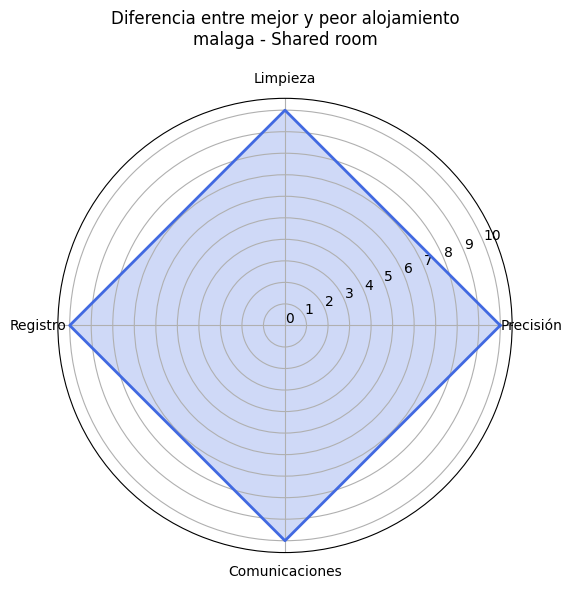

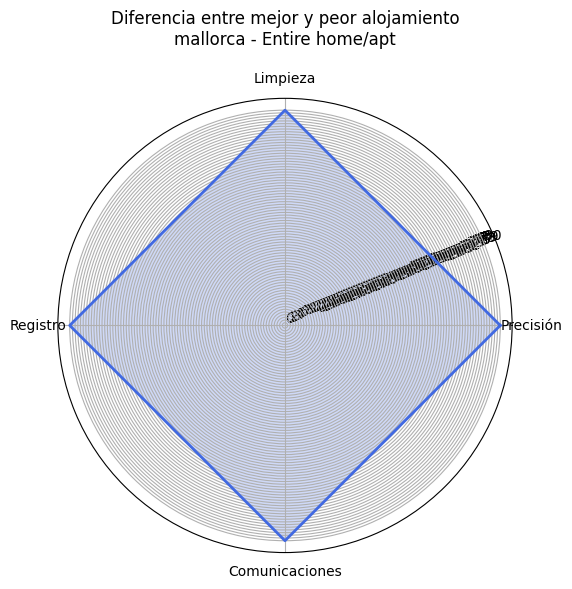

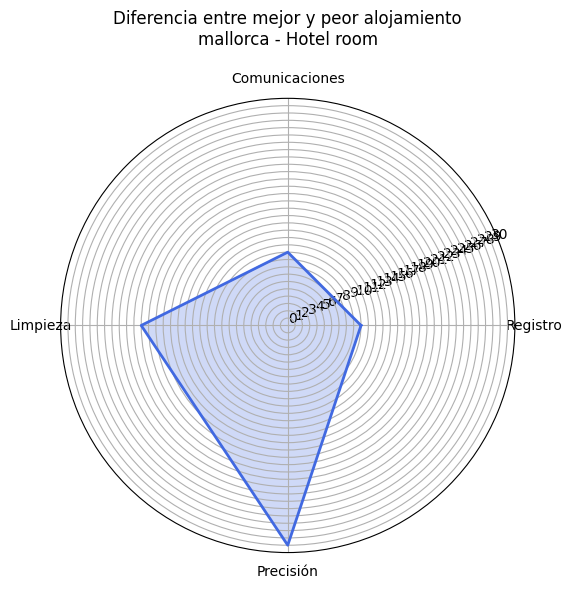

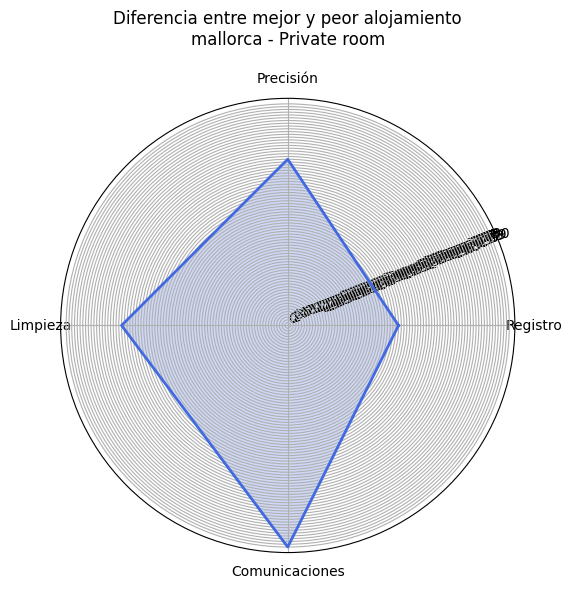

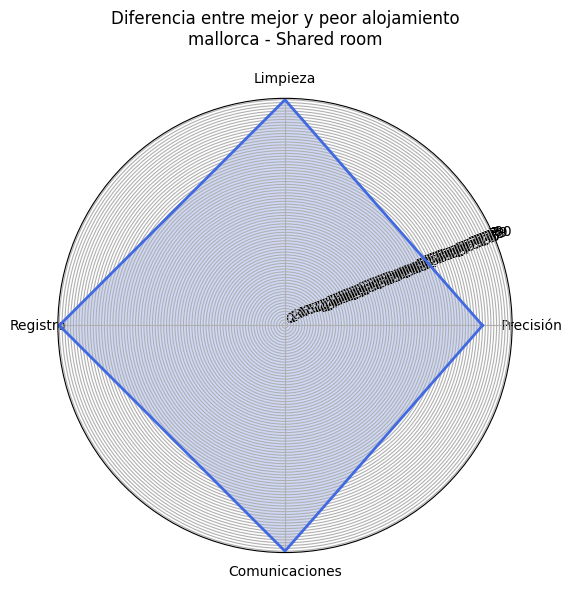

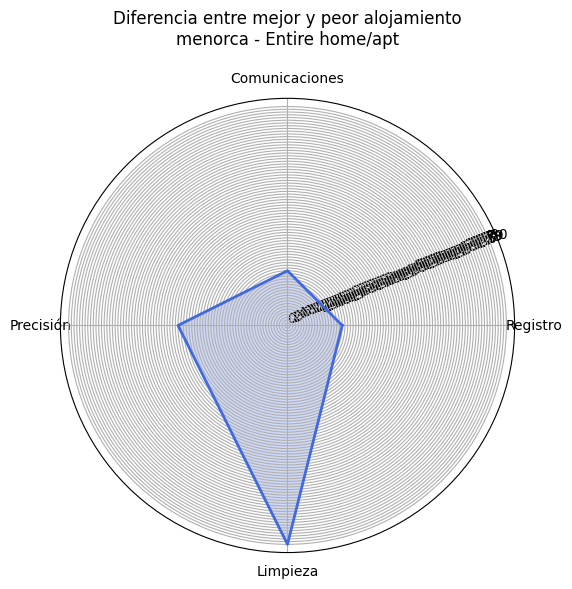

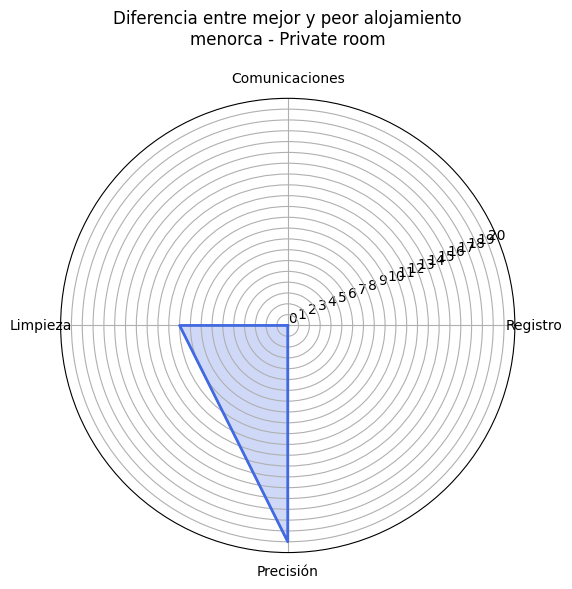

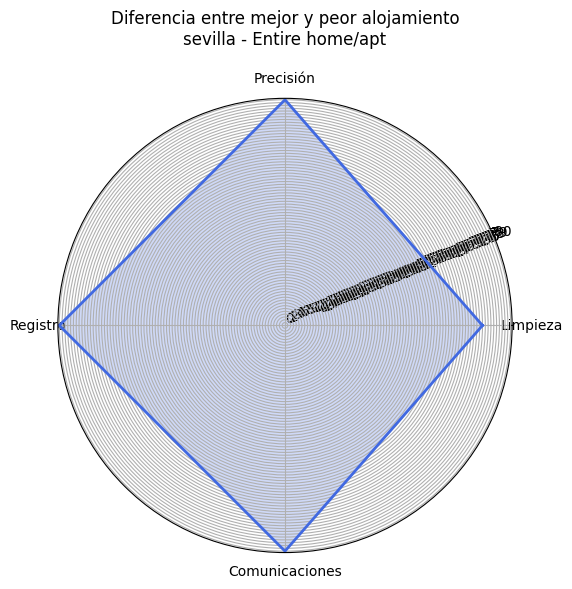

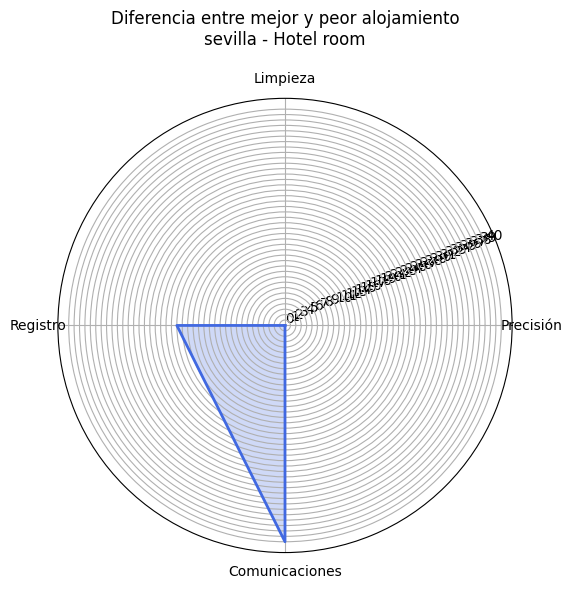

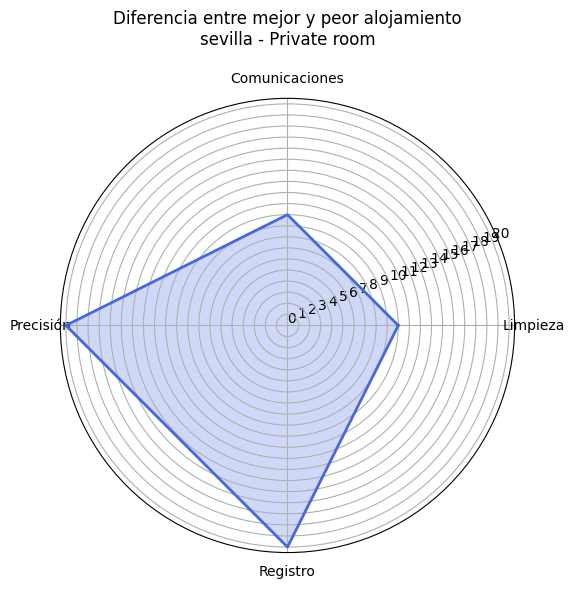

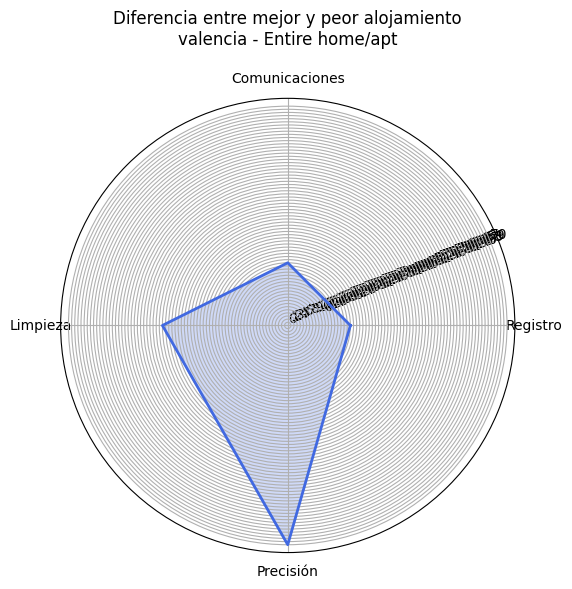

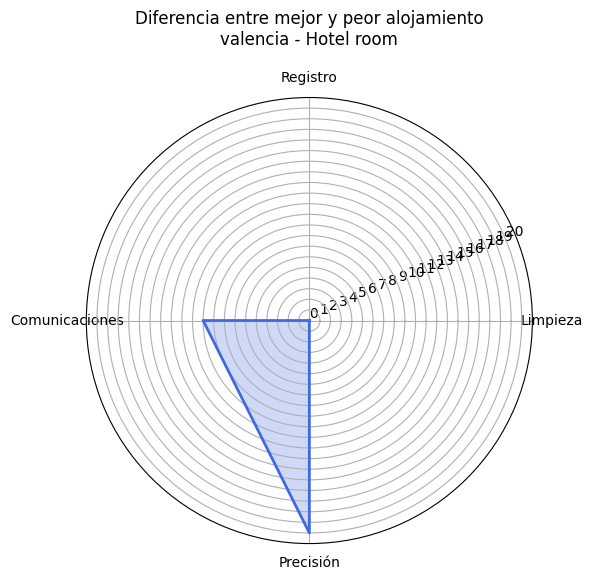

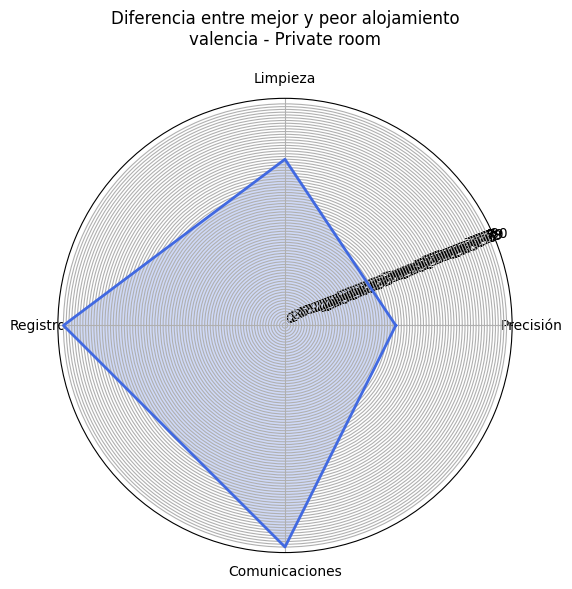

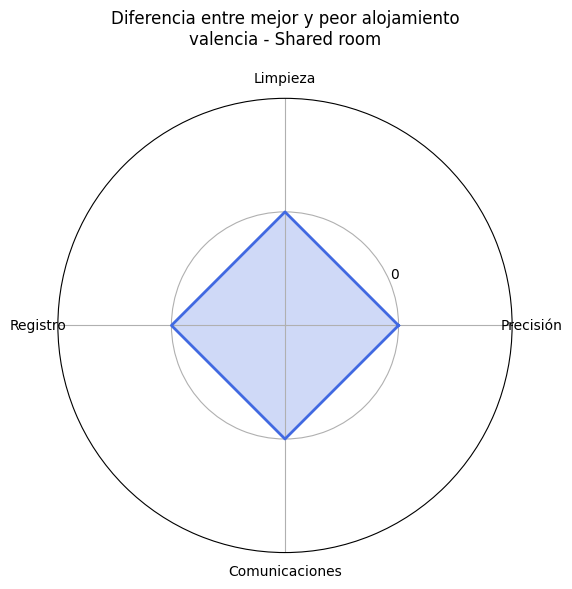

In [49]:
# Reusar los grupos creados antes
for (city, room_type), group in grouped:
    mejor = group.loc[group['review_scores_rating'].idxmax()]
    peor = group.loc[group['review_scores_rating'].idxmin()]
    diferencias = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)

    labels = diferencias.index
    values = diferencias.values.tolist()
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='royalblue', linewidth=2)
    ax.fill(angles, values, color='royalblue', alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, max(values)+1, 1))
    ax.set_title(f"Diferencia entre mejor y peor alojamiento\n{city} - {room_type}", y=1.1, fontsize=12)

    plt.tight_layout()
    plt.show()
